# Notes

## Chapter 1: Introduction to Machine Learning

### <u> 1.1 Types of Machine Learning </u>

- $\textbf{Supervised Learning}$
    - Labeled Data
    - Direct Feedback
    - Predict outcome/future
    - Subcategories:
        - Classification - predict categorical class
        - Regression - predict continuous outcomes
- $\textbf{Unsupervised Learning}$
    - No labels/targets
    - No feedback
    - Find hidden structure in data
    - Subcategories:
        - Clustering - organize data into meaningful subgroups
        - Dimensionality Reduction - compress the data onto a smaller dimensional subspace while retaining most of the relevant information
- $\textbf{Reinforcement Learning}$
    - Decision process
    - Reward system
    - Learn series of actions
    - Agent improves its performance based on interactions with the environment

## Chapter 2: Simple Machine Learning Algorithms For Classification

<img src="figures/machineLearningRoadmap.png" width="50%"/>

### <u> 2.1 Perceptron </u>

- Rosenblatt's thresholded perceptron model mimics the function of a single neuron in the brain
- Use perceptron implementation to create a decision boundary to classify data into categories (binary)
- $\textbf{OvR}$: one-versus-rest - technique that allows us to extend any binary classifier to multi-class problems
- Takes a combination of certain inputs and a corresponding weight vector to predict the outcome

- Learning rule:
    1. Initialize the weights and bias unit to 0 or small random numbers
    2. For each training example, $x^{(i)}$:
        - Compute the output value, $\hat{y}^{(i)}$ (predicted class label)
        - Update the weights and bias unit
            - $w_{j} := w_{j} + \Delta w_{j}$ where $\Delta w_{j} = \eta(y^{(i)} - \hat{y}^{(i)})x_{j}^{(i)}$
            - $b := b + \Delta b$ where $\Delta b = \eta(y^{(i)} - \hat{y}^{(i)})$
            - $\eta$ is the learning rate


<img src="figures/PerceptronWeightsAndBias.png" width="50%"/>

### <u> 2.2 Adaptive Linear Neurons (Adaline) </u>

<img src="figures/AdalineWeightsAndBias.png" width="50%"/>

- Weights are updated based on a linear activation function rather than a unit step function like in the perceptron
- Threshold function is still used to make the final prediction
- $\textbf{Objective Function}$ - optimized during the learning process; often a loss or cost function that we want to minimize
- Adaline loss function is the mean squared error (MSE) between the calculated outcome and the true class label:
    - $L(w, b) = \frac{1}{n} \sum\limits_{i=1}^{n} (y^{(i)} - \sigma(z^{(i)}))^{2}$
- The loss function becomes differentiable and convex allowing us to use the powerful $\textbf{gradient descent}$ optimization algorithm
    - Step in the opposite direction of the gradient
    - $\Delta \mathbf{w} = -\eta \nabla_{w} L(\textbf{w}, b) = \eta \frac{2}{n} \sum\limits_{i} ( y^{(i)} - \sigma(z^{(i)}))x_{j}^{(i)}$ 
    - $\Delta b = -\eta \nabla_{b} L(\textbf{w}, b) = \eta \frac{2}{n} \sum\limits_{i} ( y^{(i)} - \sigma(z^{(i)}))$
 
<img src="figures/GradientDescent.png" width="40%"/>

- Gradient descent converges much more quickly if we implement feature scaling
- $\textbf{Standardization}$:
    - Shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance)
    - $x^{'}_{j} = \frac{x_{j} - \mu_{j}}{\sigma_{j}}$
    - where, $x_{j}$ is a vector consisting of the jth feature values of all training examples
- $\textbf{Stochastic Gradient Descent}$:
    - Instead of calculating the gradient from the entire data set we randomly pick one data point
    - Updates gradient much more frequently and although it is an approximation of the actual gradient it converges much faster
    - Fixed learning rate is replace by an adaptive learning rate that decreases over time: $\frac{c_{1}}{[number \ of \ iterations] + c_{2}}$
    - $\textbf{Online Learning}$ - model is trained on the fly as new training data arrives and data can be discarded after updating the model if storage space is an issue
- $\textbf{Mini-batch Gradient Descent}$:
    - Middle ground of SGD and full-batch gradient descent
    - Apply full-batch to a subset of the data

## Chapter 3: Machine Learning Classifiers

### <u> 3.1 Classifiers </u>

- No free lunch theorem - no single classifier works best across all possible scenarios
- It is recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem. These may differ in:
    - The number of features or examples
    - The amount of noise in the dataset
    - Whether the classes are linearly separable
 
- The five main steps involved in training a supervised machine learning algorithm:
    1. Selecting features and collecting labeled training examples
    2. Choosing a performance metric
    3. Choosing a learning algorithm and training a model
    4. Evaluating the performance of the model
    5. Changing the settings of the algorithm and tuning the model

### <u> 3.2 Overfitting </u>

- $\textbf{Overfitting}$ - a model performs well on training data but does not generalize well to unseen data (test data)
- It is said the model suffers from having high variance which can be caused by having too many parameters, leading to a model that is too complex for the underlying data
- $\textbf{Underfitting}$ - (high bias) the model is not complex enough to capture the pattern in the training data well and suffers from low performance on unseen data

<img src="figures/Overfitting.png" width="50%"/>

- $\textbf{bias-variance tradeoff}$:
    - high variance refers to overfitting
    - high bias refers to underfitting
 
- One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization
- $\textbf{Regularization}$ - introduce additional information to penalize extreme parameter (weight) values. Useful method for handling:
    - colinearity - high correlation among features
    - filtering out noise from the data
    - preventing overfitting
- $\textbf{L2 regularization}$ - (L2 shrinkage / weight decay) most common form of regularization. Adds the following term to the loss function:
    - $\frac{\lambda}{2n} ||\textbf{w} ||^{2} = \frac{\lambda}{2n} \sum\limits_{j=1}^{m} w_{j}^{2}$
    - Regularization parameter, $\lambda$ - used to control how closely we fit the traing data, while keeping the weights small
    - Parameter C implemented in Logistic Regression class in scikit-learn comes from SVM and is inversely proportional to the $\lambda$
    - If the regularization strength is set too high the weight coefficients approach zero and the model can perform poorly due to underfitting

### <u> 3.3 Logistic Regression </u>

- Linear model used for binary classification
- Very easy to implement and performs very well on linearly separable classes
- Easily updated, which is attractive when working with streaming data
- The activation function becomes the sigmoid function which maps any number back to [0, 1] range
- The output of the sigmoid function is then interpreted as the probability of a particular example belonging to a class
- This probability is often just as interesting as the predicted class label
- It is recommended to use more advanced approaches than regular SGD (newton-cg, lbfgs, liblinear, sag, saga)

<img src="figures/LogisticRegression.png" width="50%"/>

### <u> 3.4 Support Vector Machines (SVM) </u>

- Extension of the perceptron
- Optimization objective is to maximize the margin
- Less prone to outliers than logistic regression, but is more complex to implement and derive

- $\textbf{Margin}$ - the distance between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane
- $\textbf{Suppor Vectors}$ - training examples that are closest to the decision boundary
- The rationale is decision boundaries with large margins tend to have a lower generalization error, whereas models with small margins are more prone to overfitting

<img src="figures/SVM.png" width="50%"/>

- The slack variable was introduced because the linear contraints in the SVM optimization in the presence of misclassifications, under appropriate loss penalization. This slack variable introduces the variable C in SVM context.
- $\textbf{C}$ - hyperparameter for controlling the penalty for misclassification. (smaller C less strict misclassification errors) Can be used to control the width of the margin and therefore tune the bias-variance tradeoff

<img src="figures/CHyperparameter.png" width="50%"/>

- SVM can be easily kernalized to solve nonlinear classification problems
- kernel methods deal with linearly inseparable data by creating a nonlinear combination of the original features to project them onto a higher-dimnsional space via a mapping function, $\phi$
- Solving a nonlinear problem using SVM:
    1. Transform the training data into a higher-dimensional feature space using the mapping function, $\phi$
    2. Train a linear SVM model to classify the data in the new feature space
    3. Use $\phi$ to transform new, unseen data to classify it using the linear SVM model

<img src="figures/KernalSVM.png" width="50%"/>

- Contruction of the new features is computationally very expensive, especially with high-dimensional data
- $\textbf{Kernal trick}$ - define a $\textbf{kernal function}$, $\phi(x^{(i)})^{T}\phi(x^{(j)})$, (usually radial basis function (RBF) kernal or the Gaussian kernal) to save the expensive step of calculating the dot product $x^{(i)T}x^{(i)}$
- 'Kernel' can be interpreted as a similarity function between a pair of examples
- In Gaussian kernel we have the hyperparameter $\gamma = \frac{1}{2\sigma^{2}}$ which can be understood as a cut-off parameter for the Gaussian sphere. Higher $\gamma$ increases the influence of the training examples which leads to a tighter and bumpier decision boundary
- $\gamma$ plays an important role in controlling overfitting

### <u> 3.5 Decision Tree </u>

<img src="figures/DecisionTree.png" width="30%"/>

- Attractive models if we care about interpretability
- Breaking down the data by making a decision based on asking a series of questions
- The decision tree model learns a series of questions to infer the class labels of the examples
- Start at the tree root and split the data on the feature that results in the largest information gain. We continue this splitting until the leaves are pure.
- Can easily lead to overfitting because of how deep the trees can become. Therefore, we want to prune the tree by setting the mimit for the maximum depth of the tree
- Our objective funciton is defined to maximize the IG at each split:
    - $IG(D_{p},f) = I(D_{p}) - \sum\limits_{j=1}^{m} \frac{N_{j}}{N_{p}}I(D_{j})$
    - f is the feature to perform the split
    - $D_{p}$ and $D_{j}$ are the dataset of the parent and the jth child node
    - I is the impurity measure
    - $N_{p}$ is the total number of training examples at the parent node
    - $N_{j}$ is the number of examples in the jth child node
    - The information gain is the difference between the impurity of the parent node and the sum of the child node impurities.
- Most libraries implement binary decision trees where the parent node is split into two child nodes $D_{left}$ and $D_{right}$ to reduce the combinatorial search space
    - $IG(D_{p},f) = I(D_{p}) - \frac{N_{left}}{N_{p}}I(D_{left}) - \frac{N_{right}}{N_{p}}I(D_{right})$
- Impurity Measures or Splitting criteria:
    - Gini impurity ($I_{G}$)
        - $I_{G}(t) = \sum\limits_{i=1}^{c} p(i|t) (1 - p(i|t)) = 1 - \sum\limits_{i=1}^{c}p(i|t)^{2}$
    - Entropy ($I_{H}$)
        - $I_{G}(t) = - \sum\limits_{i=1}^{c} p(i|t)\log_{2}p(i|t)$
        - $p(i|t)$ is the proportiion of examples that belong to class i for a particular node, t
    - Classification Error ($I_{E}$)
        - $I_{E}(t) = 1 - \max[p(i|t)]$
        - Useful for pruning,but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes

<img src="figures/DTImpurities.png" width="40%"/>

- Gini impurity and entropy typically yield very similar results, and it is often not worth spending much time on evaluating trees using different impourity criteria rather than experimenting with different pruning cut-offs

- Decision trees can build complex decision boundaries by dividing the feature space into rectangles

### <u> 3.6 Random Forest </u>

- Good scalability and easy to use
- Not as interpretable as decision trees but you do not have to worry about choosing good hyperparameters and typically does not need to be pruned
- Ensemble of decision trees
- Average multiple (deep) decision trees that individually suffer from high variance to build a more robust modl that has a better generalization performance and is less susceptible to overfitting
- Random forest algorithm:
    1. Draw a random bootstrap sample of size n(randomly choose n examples from the training dataset with replacement)
    2. Grow a decision tree from the bootstrap sample. (note: instead of evaluating all features to determine the best split at each node, we only consider a random subset of these.) At each node:
        - Randomly select d feature without replacement
        - Split the node using the feautre that provides the best split according to the objective function, for instance, maximizing the information gain
    3. Repeat steps 1-2 times
    4. Aggregate the prediction by each tree to assign the class label by majority vote. 
- Hyperparameters:
    - k - number of trees: the larger the number of trees, the better the performance of the random forest classifier at the expense of increased computational cost
    - n - the size of the bootstrap sample: decreasing the boostrap sample increases diversity among the individual trees (increased randomness) but smaller samples typically result in a lower overall performance and small gap between training and test performance. Too larger and you increase the degree of overfitting
    - d - number of features that are randomly chosen for each split: Choose a value smaller than the total number of features in the training dataset, m. Often chosen as $d = \sqrt{m}$
  

### <u> 3.7 K-nearest neighbors (KNN) </u>

- $\textbf{Lazy Learner}$ - does not learn a discriminative function from the training data, but memorizes the training dataset instead
- KNN Algorithm:
    1. Choose the number of k and a distance metric
    2. Find the k-nearest neighbors of the data record that we want to classify
    3. Assign the class label by majority vote
 
<img src="figures/KNN.png" width="30%"/>

- choosing k and an appropriate distance cutoff is crucial for bias-variance tradeoff (Eucludean distance if data is standardized)
- Very susceptible to overfitting due to the curse of dimensionality (data becomes increasly sparse with more dimensions)
- Can you use feature selection and dimension reduction techniques to help avoid this

### <u> 3.8 Summary </u>

- Decision Trees are particularly attractive if we care about interpretability
- Logisitic Regression is useful for online learning via SGD and allows us to predict the probability of a particular event
- SVMs are powerful linear models that can be extended to non-linear problems via the kernel trick, but have many parameters that have to be tuned
- Random Forests - don't require much parameter tuning and don't overfit as easily as decision trees
- KNN is an alternative approach to classification via lazy learning that allows us to make predictions without any model training, but with a more computationally expensive prediction step
  

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

perceptron = SGDClassifier(loss='perceptron')
logisticRegression = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
tree_model = tree.DecisionTreeClassifier(criterion='gin1', max_depth=4, random_state=1)
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

#tree_model.fit(X_train, y_train)
#tree.plot_tree(tree_model, feature_names = feature_names, filled=True)
#plt.show()

## Chapter 4: Data Preprocessing

### <u> 4.1 Missing Data </u>

- In real-world applications it is common for training examples to be missing one or more values (blank, NaN, NULL)
- Can use isnull() in Pandas to identify the number of missing values in a data frame
    - df.isnull().sum() 
1. $\textbf{Eliminate Training examples or features with missing values}$
    - Drop training examples with missing values
        - df.dropna(axis=0)
    - Drop rolumns that have at lease one NaN
        - df.dropna(axis=1)
    - Drop rows where all values NaN
        - df.dropna(how='all')
    - Drop rows that have fewer than x values
        - df.dropna(thresh=x)
    - Drop rows where NaN in columns X,Y,...
        - df.dropna(subset=['X','Y'])
2. $\textbf{Input missing values}$
    - Dropping data may not be feasible because we might lose too much valuable data
    - Instead we use interpolation techniques to estimate the missing value from the other trainging examples
        - $\textbf{Mean Imputation}$ - replace the missing value with the mean values of the entire feature column
            - sklearn.impute SimpleImputer 
            - df.fillna(df.mean())
            - KNNImputer
- Scikit-learn Transformer API:
    - fit - learn the parameters from the training data
    - transform - use fit parameters to transform the data
    - Data array needs to have the same number of features as the data array that was used to fit the model

<img src="figures/TransformerAPI.png" width="40%"/>

- Scikit-learn Estimators API:
    - Have a predict method, but also have a tranform method
    - fit - learn the parameters of a model (such as used in the estimators for classification)
    - In supervised learning tasks, we also provide the class labels for the fitting the model, which can theb be used to make predictions about new, unlabeled data examples using predict
 
<img src="figures/EstimatorsAPI.png" width="30%"/>

### <u> 4.2 Categorical Data </u>

- Non-numerical data:
    - $\textbf{Ordinal}$ - categorical values that can be sorted or ordered (t-shirt sizes)
    - $\textbf{Nominal}$ - don't imply any order (t-shirt colors)

#### 4.2.1 Mapping Ordinal Features

- Learning algorithms do not use ordinal inforrrmation inc class labels
- We need to map the catergorical string values into integers
    - mapping must be defined manually
        - mapping = {'M':1, 'L':2, 'XL':3}
        - reverse_mapping = { v: k for k, v in size_mapping.items()}
    - Pandas map method can be use with defined mapping
        - df['size'].map(mapping)

#### 4.2.2 Encoding Class Labels

- Some machine learning libraries require that class labels are encoded as integer values
- Most estimators in scikit-learn convert class labels to integers internally
- Map to integers similar to the ordinal features
- Also there is a LabelEncoder in sklearn.preprocessing that also does this
    - fit_transform
    - inverse_transform 

#### 4.2.3 One-Hot Encoding on Nominal Features

- Since order does not matter we can use the LabelEncoder to encode string labels into integers
- Most common mistakes in dealing with nominal categorical data: The data is nominal, but the integers say that one category is larger than the other. You would still obtain useful results, but not optimal results. The solution to this is One-Hot encoding.
- $\textbf{One-hot encoding}$ - create a new dummy feature for each unique value in the nominal feature column that is binary.
    - sklearn.preprocessing has a OneHotEncoder API
    - sklearn.compise has ColumnTransformer to apply to select columns
    - get_dummies(df, drop_first=True) method from pandas - only effects string column
- Introduces multicolinearity which can be an issue for certain methods (methods that require matrix inversion)
- Can remove one feature column from the one-hot encoded array to reduce correlation among variables
- If categorical features have high caridnality then we may need to use alternative methods to One-Hot Encoding
    - $\textbf{Binary Encoding}$ - produces multiple binary features, but requires fewer columns. Numbers are converted into binary and then each binary number position will form a new feature column
    - $\textbf{Count Encoding}$ or $\textbf{Frequency Encoding}$ - replaces the label of each category by the number of times or frequency it occurs in the data set

#### 4.2.4 Encoding Ordinal Features (Optional)

- If you are unsure about the numerical differences between categories of ordinal features, or that difference is not defined, we can also encode them using a threshold encoding with binary values
- T-Shirt sizes of M, L, and XL can be divided into 2 columns of x > M and X > L. (relative differences are not accounted for)

### <u> 4.3 Partitioning Data into Training and Test Datasets </u>

- We divide our data into serparate datasets for training and testing
- Comparing predicitions to true labels in the test set can be understood as the unbiased performance evaluation of our model before applying in the real-world
- Stratify assures the same proportions of each class to the original dataset
- Choosing the ratio:
    - The larger the test set, the more we are withholding valuable information
    - The smaller the test set, the more inaccurate the estimation of the generalization error
    - Most common splits are 60:40, 70:30, 80:20 depending on the size of the initial dataset
    - 90:10 or 99:1 for very large datasets (>100k)
- Instead of discarding the allocated test data after the model training and evaluation it is common practive to retrain a classifier on the entire dataset, as it can improve the predictive performance of the model. (Generally recommended, but if the training data set is small and the test data contains outliers then this could lead to worse generalization performance)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### <u> 4.4 Bringing Features onto the Same Scale </u>

- $\textbf{Feature Scaling}$ is a crucial step in data preprocessing
- Decision trees and random forests are 2 of the very few machine learning algorithms where we don't need to worry about feature scaling. (scale-invariant)
- Most machine learning optimaization algorithms behave much better iff the features are on the same scale
- Two most common ways of scaling features are normalization and standardization
- $\textbf{Normalization}$ - rescaling of the features to a range of [0, 1] (special case of min-max scaling)
    - $x^{(i)}_{norm} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}}$
    - useful when we need values in a bounded interval
- $\textbf{Standardization}$ - Shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance)
    - $x^{(i)}_{std} = \frac{x^{(i)} - \mu_{x}}{\sigma_{x}}$
    - does not change the shape of the distribution and does not convert non-normally distributed data into normally distributed data
    - maintains useful information about outliers and makes the algorithm less sensitive to them unlike normalization which scales the data to a limited range
- $\textbf{Robust Scaling}$ - scales the data based on the 25th and 75th quantile, so outliers become less pronounced
    - Small datasets that contain many outliers
    - If the machine learnign algorithm applied to this dataset is prone to overfitting

In [ ]:
fromsklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### <u> 4.5 Selecting Meaningful Features </u>

- If a model performs much better on a training dataset than on the test data set, this observation is a strong indicator of overfitting.
- Common solutions to reduce generalization error:
    - Collect more training data
    - Introduce a penalty for complexity via regularization
    - Choose a simpler model with fewer parameters
    - Reduce the dimensionality of the data
 
- Sometime more training data is often not applicable therefore we look to common ways to reduce overfitting
    - regularization
    - dimensionality reduction via feature selection


#### 4.5.2 L2 Regularization

- Reduce the complexity of a model by penalizing large individual weights by adding a penalty term to the loss function
- L2 norm of the weight vector
    - $||\textbf{w}||^{2}_{2} = \sum\limits_{j=1}^{m} w^{2}_{j}$
- Regularization parameter, $\lambda$

##### Geometric Interpretation
<img src="figures/L2Reg.png" width="30%"/>

- L2 regularization term is represented by the shaded ball
- Our weight coefficients cannot fall outside the shaded area
- Under the penalty contraint, our best effort is to choose the point where the L2 ball intersects with the contours of the unpenalized loss function
- The larger the value of $\lambda$ the faster the penalized loss grows, which leads to a narrower L2 ball
- Our goal is to minimize the sum of the unpenalized loss plus the penalty term, This can be understood as adding bias and perferring a simpler model to reduce the variance in the absence of sufficient training data to fit the model

#### 4.5.1 L1 Regularization

- Reduce the complexity of a model
- L1 norm of the weight vector
    - $||\textbf{w}||_{i} = \sum\limits_{j=1}^{m} |w_{j}|$
- Usually yields sparse feature vectos, and most feature weights will be zero.
- Sparsity can be useful if we have high-dimensional dataset with many features that are irrelevant (especially if we have more irrelevant dimensions than training examples)
- set penalty to 'l1' in scikit-learn mdeols that support it

##### Geometric Interpretation

<img src="figures/L1Reg.png" width="30%"/>

- Similar to L2 except L1 is the sum of the absolute weight conditions we represent it as a diamond-shape budget
- We can see the contour of the loss function touches the L1 diamond at $w_{1} = 0$
- Since the contours of an L1 regularized system are sharp, it is more likely that the optimum (intersection between the ellipses of the loss function and the boundary of the L1 diamond) is located on the axes, which encourages sparsity
  

#### 4.5.3 Sequential Feature Selection Algorithms

- An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, especially useful for unregularized models
- 2 categories of dimensionality reduction techniques
    - $\textbf{Feature Selection}$ - select a subset of the original feature
    - $\textbf{Feature Extraction}$ - derive information from the feature set to construct a new feature subspace
- Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an intial d-dimensional feature space to a k-dimensional feature subspace where k<d
- The motivation is to automatically select a subset of features that are most relevant to the problem, to improve computational efficiency, or to reduce the generalization eror of the model by removing irrelevant features or noise (good for algorithms that don't support regularization)
- $\textbf{Sequential Backward Selection (SBS)}$ - aims to reduce dimensionality of the intial feature subspace with a minimum decay in the performance of the classifier to improve upon computational efficiency. Can improve predictive power of a model if it suffers from overfitting
- The idea behind SBS algorithm is to sequentially remove features from the full feature subset until the new feature subspace contains the desired number of features 
- To choose which feature to remove at each stage, we define a criterion function, J, that we want to minimize
- We eliminate the feature that causes the least performance loss after removal
- SBS Algorithm:
    1. Initialize the algorithm with k=d, where d is the dimensionality of the full feature space, $X_{d}$
    2. Determine the feature, $x^{`}$, that maximizes the criterion: $X^{`} = argmax J(X_{k} - x)$, where $x \ \epsilon \ X_{k}$.
    3. Remove the feature, $x^{`}$, from the feature set: $X_{k-1} = X_{k} - x^{`}$; $k = k-1$
    4. Terminate if $k$ equals the number of desired features, otherwise, go to step 2

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)
sfs.get_support()
sfs.transform(X).shape

#### 4.5.4 Assessing Feature importance with random forests

- Using random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest
- Scikit-Learn collexts the feature importance values for us in feature_importances_ attribute after fitting a RandomForestClassifier.
- Feature importance will sum up to 1
- If two more more features are highly correlated, one feature may be ranked vary highly while the information on the other feature(s) may not be fully captured - we do not need to be concerned with this if we are merely interested in the predictive performance of a model ranther than the interpretation of feature importance values
  
<img src="figures/RandomForestFS.png" width="30%"/>

## Chapter 5: Dimensionality Reduction

### 5.1 Feature Extraction With Principal Component Analysis (PCA)

- We can use feature extraction techniques to reduce the number of features in a dataset by transforming or projecting the data onto a new feature space
- $\textbf{Feature extraction}$ - an approach to data compression with the goal of maintaining most of the relevant information
    - improve storage space
    - improve compuutation efficiency of the learning algorthm
    - improve predictive performance by reducing the curse of dimensionality (especially with non-regularized models)

#### PCA
- Unsupervised linear transformation technique used for feature extraction and dimensionality reduction
- Other popular applications of PCA:
    - Exploratory data analysis
    - Denoising of signals in stock market trading
    - Analysis of genome data and gene expression levels in the filed of bioinformatics
- Helps to identify patterns in data basedo nt he correlation between features
- Aims to find the directions of maximum vairance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one.
- The orthogonal axes (principal compnents) of the new subspace are the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other

<img src="figures/PCA.png" width="40%"/>

- Given that we transform the original $d$-dimensional data onto a new $k$-dimensional subspace (typically $k$ << $d$), the first principal compoenet will have the largest possible variance.
- Each succesive principal component will have the largest variance given the contraint that it is orthogonal to the other principal components
- Highly sensitive to data scaling (features need to be standardized)

- PCA Algorithm:
    1. Standardize the $d$-dimensional dataset
    2. Construct the covariance matrix
        - $\Sigma = \begin{bmatrix} \sigma_{1}^{2} & \sigma_{12} & \sigma_{13} \\ \sigma_{21} & \sigma_{2}^{2} & \sigma_{23} \\ \sigma_{31} & \sigma_{32} & \sigma_{3}^{2} \end{bmatrix}$
        - $ \sigma_{jk} = \frac{1}{n - 1} \sum\limits_{i=1}^{n} (x_{j}^{(i)} - \mu_{j})(x_{k}^{(i)} - \mu_{k})$
    4. Decompose the covariance matrix into its eigenvectors and eigenvalues
        - $\Sigma \textbf{v} = \lambda \textbf{v}$
        - $\lambda$ - eigenvalue
    6. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
    7. Select $k$ eigenvectors, which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature ssubspace ($k \leq d$)
    8. Construct a projection matrix, $W$, from the 'top' $k$ eignevectors
    9. Transform the $d$-dimensional input dataset, $X$, using the projection matrix, $W$, to obtain the new $k$-dimensional feature subspace
        - Transform a training example - $x^{`} = xW$
        - Transform the whole data set - $X^{`} = XW$
##### Total and Explained Variance
- Select a subset of eigenvectors that contains most of the information (variance)
- $\textbf{Variance Explained Ratios}$ of eigenvalue, $\lambda_{j}$ - how much of the variance does the eigenvector account for:
    - Explained variance ratio $= \frac{\lambda_{j}}{\sum\limits_{j=1}^{d} \lambda_{j}}$

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

pca = PCA(n_components=None)
pca.explained_variance_ratio_

# Plot feature contributions for PC1
sklearn_loadings = pca.components_.T * nps.sqrt(pca.explained_variance_)
fig, ax = plt.sunplots()
ax.bar(range(nFeatures), sklearn_loadings[:, 0], align='center')
plt.ylim([-1, 1])


### 5.2 Linear Discriminant Analysis (LDA)

- Technique for feature extraction to increase computational efficiency and reduce the degree of overfitting due to the curse of dimensionality in non-regularized models
- Unlike PCA which attempts to find the orthogonal component axes of maximum variance in a dataset, the goal of LDA is to find the feature subspace that optimizes class seperability
- Assumes:
    - Data is normally distributed
    - Classes have identical covariance matrices
    - The training exampels are statistically independent of each other
- Can still work if one, or more, assumptions is (slightly) violated
- At most there are $c - 1$ linear discriminants, where $c$ is the number of class labels
- LDA Algorithm:
    1. Standardize the $d$-dimensional dataset
    2. For each class, compute the $d$-dimensional mean vector
        - $\textbf{m}_{i} = \frac{1}{n} \sum\limits_{x \epsilon D_{i}} \textbf{x}_{m}$
        - Each mean vector, $\textbf{m}_{i}$, stores the mean feature value, $\mu_{m}$
    5. Construct the between-class scatter matrix, $S_{B}$, and the within-class scatter matrix, $S_{w}$
       - $ \textbf{S}_{w} = \sum\limits_{i=1}^{c} \textbf{S}_{i} $
       - $\textbf{S}_{i} = \sum\limits_{x \epsilon D_{i}} (x - \textbf{m}_{i})(x - \textbf{m}_{i})^{T}$
       - $\textbf{S}_{B} = \sum\limits_{i=1}^{c} n_{i} (\textbf{m}_{i} - \textbf{m}) (\textbf{m}_{i} - \textbf{m})^{T}$
       - $\textbf{S}_{i}$ - scatter matrix of class $i$
       - $\textbf{m}$ - overall mean computed from all classes
    7. Compute the eigenvectors and corresponding eigenvlaues of the matrix, $S_{w}^{-1}S_{B}$
    9. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
    10. Choose the $k$ eigenvectors that correspond to the $k$ larges eigenvalues to construct a $d\times k$-dimensional transformation matrix, $W$; the eigenvectors are the columns of this matrix
    11. Project the examples onto the new feature subspace using the transformation matrix, $W$. 

<img src="figures/LDA.png" width="40%"/>


In [ ]:
from sklearn.discriminant_analysis import LineaqrDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std)
X_test_lda = lda.transform(X_test_std)

### 5.3 Non-Linear Dimensionality Reduction and t-Distributed Stochastic Neighbor Embedding (t-SNE)

- If we are dealing with nonlinear problems, linear transformation techniques for dimensionality reduction (PCA and LDA) may not be the best choice
- The development and application of nonlinear dimensionality reduction techniques is often reffered to as manifold learning
- Algorthms for manifold learning have to capture the complicated structure of the data in order to project it onto a lower-dimensional space where the relationship between data points is preserved.

<img src="figures/NonlinearProblem.png" width="40%"/>

- Manifold learning algorithms are very powerful, but are notoriously hard to use, and with non-ideal hyperparameter choices they may cause more harm than good
- The reason behind this difficult is that we are often working with high-dimensional datasets that we cannot readily visualize and where the structure is not obvious
- Also, if we don't project the dataset into two or three dimensions it is hard or even impossible to assess the quality of the results

#### t-SNE

- In a nutshell, it is modeling data points based on their pair-wise distances in the high-dimensional feature space
- It finds a probability distribution of pair-wise distances in the new, lower dimensional space that is close to the probability distribution of pair-wise distances in the original dataset
- t-SNE learns to embed data points into a lower-dimensional space suc that the pairwise distances inthe original space are preserved
- It is intended for visualization purposes as it requires the whole dataset for the projection. Since it projects the points directly, we cannot apply t-SNE to new data points
- Hyperparameters:
    - Perplexity
    - Learning Rate (epsilon)
 
#### Uniform manifold approximation and projection (UMAP)
- Another popular visualizaiton technique
- Can produce similarly good results sd t-SNE
- Typically faster than t-SNE
- Can be used to project new data, whcih makes it more attractive as a dimensionality reduction technique in a machine learning context



In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

## Chapter 6: Model Evaluation and Hyperparameter Tuning

### 6.1 Streamlining Workflows with Pipelines

- Instead of going through model fitting and data transformation steps for the training and test data sets seprately, we can chosin them into a pipeline
- make_pipeline function takes an aritrary number of scikit-learn transformers, followed by a scikit-learn estimator that implements the fit and predict methods

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components-2), LogisticRegression())

# Fit
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)

- StandardScaler -> PCA -> LogisiticRegression
- fit will pass the data down the pipeline and then the estimator will fit the processed data
- predict will pass tha data down the pipeline and then the estimator will predict the processed data

<img src="figures/Pipeline.png" width="40%"/>

### 6.2 Cross-Validation Techniques

- Help us to obtain reliable estimates of the model's generalizations performance

#### 6.2.1 Holdout Cross-Validation

- Using the holdout methods, we split our intial dataset into separate training and test datasets, the former is for model training, and the latter is used to estimate its generalization performance
- We are interested i tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data
- $\textbf{Model Selection}$ - refers to a given a classfication problem for which we want to select the optimal values of tuning parameters (hyperparameters)
- If we reuse the same test dataset over and over again during model selection, it will beomce part of our training data and thus the model will be more likely to overfit
- The best way of using the holdout method is to separate the  data into three parts:
    - training dataset - fit the different models
    - validation dataset - performance on the validation dataset is used for model selection
    - test dataset
- The advantage of having a test dataset that the model hasn't seen before during the training and model seleciton steps is that we can obtain a less biased estimate of its ability to generalize  to new data

<img src="figures/HoldoutValidation.png" width="40%"/>

- Disadvantage is that the performance estimate may be very sensitive to how we partion the dataset into the training and validation subsets

#### 6.2.2 K-Fold Cross-Validation

- Repeat the holdout method $k$ times on $k$ subsets of the training data
- Randomly splut the training dataset into $k$ folds without replacement
- $k - 1$ folds (training folds) are used for model training
- One folds (test fold) - is used for performance evaluation
- This procedure is repeated $k$ times so that we obtain $k$ models and perforamnce estimates
- We then calcualte the average performance of the models based on the different, independent test folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method
- Typically, we use k-fold cross-validation for model tuning (finding the optimal hyperparameter values that yield a satisfying generalization performance)
- Once we have found satisfactory hyperparameter values, we can retrain the model on the complete dataset and obtain a final performance estimate using the independent test dataset, as providing more training examples to a learnign algorthm usuallly results in a more accurate and robust model

<img src="figures/KFoldsValidation.png" width="40%"/>

- A good standard value for $k$ in k-fold croos-validation is 10, as it seems to offer the best tradeoff between bias and variance
- If we are working with relatively small training sets, it can be useful to increase the number of folds
- If we increae $k$, more training data is used in each iteration, which results in a lower pessimistic bias towards estimating the generalization perforamnce by averaging the individual models
- Larger $k$ values will increase the runtiume of the cross-validation algorithm and yield estimates with higher variance.
- On the other hand, if we are working with large datasetsm we can choose a smaller value for $k$

- $\textbf{Leave-One-Out Cross-Validation (LOOCV)}$
    - a special case of k-fold cross-validation.
    - We set the number of training folds to the number oftraining examples ($k = n$) so that only one training example is used for testing during each iteration.
    - Recommended for working with very small datasets
 
- $\textbf{Stratified K-Fold Cross-Validation}$
    - A slight improvment of standard k-folds
    - Can yield better bias and variance estimates, especially in cases of unequal class proportions
    - Class label proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator-pipe_lr, X=X_train, y=t_train, cv=10, n_jobs=1)
# n_jobs = -1 uses all available CPUs on the machine

### 6.3 Learning and Validation Curves

- Two tools that can help us improve the performance of a learning algorithm:
    - Learning Curves
    - Validation Curves

- By plotting the model training and validation accuracies as functions of the training dataset size, we can eaisly detectwhether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem

#### Learning Curves

<img src="figures/CommonModelIssues.png" width="40%"/>

- High bias - the model has both low training and cross-validation accuracy.
    - Increase the number of model parameters
    - Decrease the degree of regularization
- High Variance - large gap between the training and cross-validation accuracy
    - Collect more training data (may not help if data is extremely noisy or model is close to optimal)
    - Reduce the complexity of the model
    - Increase the regularization parameter
    - Decrease the number of features via feature selection or feature extraction 

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, x=X_train, y=y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

#### Validation Curves
- Related to learning curves but we vary the values of the model parameters
- Ideal range is 0.1 to 1.0 in plot below
  
<img src="figures/ValidationCurve.png" width="40%"/>

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.0001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=t_ytrain, param_name='logisiticregression_C', param_range=param_range, cv=10)

### 6.4 Hyperparameter Tuning

#### 6.4.1 Grid Search

- Popular hyperparameter optimization technique
- $\textbf{Grid Search}$ - Help to improve the performance of a model by finding the optimal combination of hyperparameter values
- Specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination to obtain the optimal combination of values from this set

In [ ]:
from sklearn.model_seleciton import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScalar(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc_C': param_range, 'svc_kernel':['linear']}, {'svc_C': param_range, 'svc_gamma':param_range, 'svc_kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)

- grid search is an exhaustive search, it is guaranteed to find the optimal hyperparameters configuration if it is contained in the user-specified parameter grid
- Specifying larger hyperparameter grids make grid search very expensive in practive

#### 6.4.2 Randomized Search

- We draw hyperparameter configurations randomly from distributions (or discrete sets)
- It is not exhaustive, but allows use to explore a wider range of hyperparameter value settings in a more cost- and time-effctive manner
- Can use distributions for specifying parameter ranges
      
<img src="figures/GridVsRandomSearch.png" width="50%"/>

- Grid search may miss good hyperparameter configurations if the search space is to scarce
  

In [ ]:
import scipy.stats
param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random_seed(1)
param_range.rvs(10)
param_grid = [{'svc_C': param_range, 'svc_kernel':['linear']}, {'svc_C': param_range, 'svc_gamma':param_range, 'svc_kernel':['rbf']}]

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid,scoring='accuracy', refit=True, n_iter=20, cv=10, random_State=1, n_jobs=-1)
rs.fit(X_train, y_trian)

#### 6.4.3 Succesive Halving

- Makes finding suitable hyperparameter configuartions mroe efficient
- Given a large set of candidate configurations, successively throws out unpromising hyperparameter configurations until only one configuration remains

- Successive Haling Procedure:
    1. Draw a large set of candidate configurations via radnom sampling
    2. Train the models with limited resources, for example, a small subset of the training data
    3. Discard the bottom 50 percent based on predictive performance
    4. Go back to step 2 with an increase amount of available resources if more than one configuration remains


In [ ]:
from sklearn.model_selection import HalvingRandomSearchCV
hs = HalvingRandomSearchCV(pipe_svc, param_distribtuions=param_grid, n_candidates='exhaust', resource='n_samples', factor=1.5, random_State=1, n)jobs=-1)

#### 6.4.4 Tree-structued Parzen Estimators (TPE)

- Bayesian optimization method based on a probabilistic model that is continously updated based on  past hyperparameter evaluations as independent events
- hyperopt-sklearn package

#### 6.4.5 Nested cross-validation

- Using k-fold cross-validation in combination with grid search or randomized search is a useful approach for fine-tuning the performance of a machine learning model by varying its hyperparameters
- Nested cross-validation is a recommended approach if we want to select among different machine learning algorithms
- $\textbf{Nested Cross-Validation}$
    - We have an outer k-fold cross-validation loop to split the data into training and test folds
    - There is an inner loop to select the model using k-fold cross-validation on the training fold
    - After model selection, the test fold is then used to evaluate the model performance

Below is a 5x2 cross-validation

<img src="figures/NestedCrossValidation.png" width="40%"/>

In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc_C': param_range, 'svc_kernel': ['linear']},{'svc_C': param_range, 'svc_gamma': param_range, 'svc_kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid = param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring-'accuracy', cv=5)

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}], scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

### 6.5 Performance Evaluation Metrics

- Performance metrics that can be used to measure a models relevance:
    - Prediction accuracy
    - Precision
    - Recall
    - F1 Score
    - Matthews Correlation Coefficient (MCC)

#### 6.5.1 Confusion Matrix

- Matrix that lays out the performance of a learning algorithm
- Square matrix that reports the counts of the true positive (TP), true negative (TN), false positive (FP), and flase negative (FN) predictions of a classifier

<img src="figures/ConfusionMatrix.png" width="30%"/>

In [ ]:
from sklearn.meatrix import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
#ax.matshow(confmat)

- prediction error (ERR) and accuracy (ACC) provide general information about how many examples are misclassified
- Error is the sum of the false predicitions divided by the total predicitons
    - $ERR = \frac{FP + FN}{FP + FN + TP + TN}$
- Accuracy is calculated from the error:
    - $ACC = \frac{TP + TN}{FP + FN + TP + TN} = 1 - ERR$
- True positive rate (TPR) and false positive rate (FPR) are performance metrixs that are especially useful for imbalanced class problems
    - $FPR = \frac{FP}{N} = \frac{FP}{FP + TN}$
    - $TPR = \frac{TP}{P} = \frac{TP}{FN + TP}$

- $\textbf{Recall}$ - quantifies how many of the relevant records (positives) are captured as such (true positives)
    - $REC = TPR = \frac{TP}{P} = \frac{TP}{FN + TP}$
- $\textbf{Precision}$ - quantifies how many of the records predicted as relevant (sum of true and false positives) are actually relevant (true positives) 
    - $PRE = \frac{TP}{TP + FP}$

- In the case of malignant tumor detecting, optimizing for recall helps with minimizing the chance of not detecting a malignant tumor at the cost of predicting malignant tumors in healthy patients (higher number of FPs)
- Optimizing precision emphasizes correctness if we predict that a patient has a malignant tumor, at the cost of missing malignant tumors more frequently (higher number of FNs)

- $\textbf{F1 Score}$ - balances the up- and downsides of optimizing precision and recall, by using the harmonic mean of precision and recall
    - $F1 = 2 \frac{PRE \times REC}{PRE + REC}$
 
- $\textbf{Matthews Correlation Coefficient (MCC)}$
    - Popular in bilogical research contexts
    - $MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$
    - Range is [-1, 1]
    - Takes all elements of a confusion matrix
    - Harder to interpret than the F1 score, but it is considered the superior metric

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.meatrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
rec_val = recall_score(y_true=y_test, y_pred=y_pred)
f1_val = f1_score(y_true=y_test, y_pred=y_pred)
mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)

from sklearm.metrics import make_scorer
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv = 10)

- $\textbf{Reciever operating characteristic (ROC)}$ - useful graphs to select models for classification baed on their performance with respect to the FPR and TPE, which are computed by shifting the decision threshold of the classifier
    - The diagonal can be interpreted as random guessing
    - A classificaiton model that falls below the diagonal are considered as worse than random guessing
    - A perfect classifier would fall into the top-left corner of the graph with a TPR of 1 and FPR of 0
    - Based on the ROC curve we can compute the ROC area under the curve (ROC AUC) to characterize the performance of a classification model
- Precision-recall curves - compute for different probability thresholds of a classifier

#### Metrics for multiclass classification

- All of the previous metrics are specific to binary classification systems, however, scikit-learn implements macro and micro averaging methods to extend those scoring metrics to multiclass problems via one-vs-all (OvA) classification
- $\textbf{Micro-average}$ - calculated from the individual TPs, TNs, FPs, FNs of the system
    - $PRE_{micro} = \frac{ TP_{1} + ... + TP_{k}}{TP_{1} + ... + TP_{k} + FP_{1} + ... + FP_{k}}$
    - Useful if we want to weight each instance or prediction equally
- $\textbf{Macro-average}$ - calculated as the average scores of the different systems
    - $PRE_{macro} = \frac{PRE_{1} + ... + PRE_{k}}{k}$
    - Weights all classes equally to evaluate overall performance of a classifier with regard to the most frequent class labels
    - Used by default if using binary performance metric to evalluate multiclass classification
    - Weighted macro-average - calcualted by weighting the score of each class label by the number of true instances when calculating the average
    - Useful if dealing with class impalances
 
#### Class Imbalance
- Very common in real-world data
- When there is a class imbalance it makes sense to focus on other metrics than accuracy when comparing models
- How to deal with class imbalance:
    - Assign a larger penalty to wrong predictions on the minority class
        - set class_weight='balanced'
    - upsampling the minority class
        - resample function
    - downsampling the majority class
        - resample function
    - Generate synthetic training examples
        - Synthetic minority over-sampling technique (SMOTE) 
- No universally best solution across different problems - try out different solutions and choose the best one
   
  

## Chapter 7: Ensemble Learing

- $\textbf{Ensemble Methods}$ - combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone
- Ensemble Methods:
    - Majority Voting (Binary Classification) or Plurality Voting (Multiclass Classification)

- Train $m$ different classifiers ($C_{1}$,$C_{2}$,...,$C_{m}$)
- The ensemble can be built from different classificaiton algorithms
- Can also use the same base classificaiton algorithm, fitting different subsets of the training dataset (Random Forest)
  
<img src="figures/MajorityVoting.png" width="30%"/>

- Why do ensemble methods work better than individual classes
- Assume:
    - All $n$-base classifiers for a binary classification task have an equal error rate, $\epsilon$
    - The classifiers are independent
    - Error rates are not correlated
- Error probability of an ensemvle of base classifiers as a probability mass function of a binomial distribution:
    - $P(y \geq k) = \sum\limits_{k}^{n} \left\langle \begin{matrix} n \\ k \end{matrix}\right\rangle  \epsilon^{k} (1 - \epsilon)^{n-k}  = \epsilon_{ensemble}$

<img src="figures/EnsembleError.png" width="30%"/>

The error probabilty of an ensemble is always better than the error of an individual base classifier, as long as the base classifiers perform better than random guestting ($\epsilon \lt 0.5$)

#### 7.1 Majority Vote

- Combine the predicted class labels of each individual classifier, $C_{j}$, and select the class label, $\hat{y}$, that received the most votes
    - $\hat{y}$ = mode[$C_{1}(x)$, $C_{2}(x)$, ..., $C_{M}(x)$]
 
- Weighted majority vote:
    - $\hat{y} = $ arg max$_{i} \sum\limits_{j=1}^{m} w_{j}\chi_{A}(C_{j}(x) = i)$
    - $w_{j}$ - weight associated with a base classifier, $C_{j}$
    - $A$ is the set of unique class labels
    - $\chi_{A}$ is the characteristic function or indicator function (returns 1 if the predicted class of the $j$th classifier matches $i$)
    - For equal weights we end up with the previous equation
    - Given probabilities:
        - $\hat{y} = $ arg max$_{i} \sum\limits_{j=1}^{m} w_{j}p_{ij}$
        - $p_{ij}$ - predicted probability of the $j$th classifier for class label $i$


In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier

# Load the data and encode the class labels
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

# Split the Iris examples into 50% training and 50% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

# Evaluate the model performance of each classifier via 10-fold cross-validation
clf1 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', random_state=1)
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
pipe3 = Pipeline([['sc', StandardScaler()],['clf', clf3]])

# Define Majority Voting
mv_clf = VotingClassifier(estimators=[('lr', pipe1), ('dt', clf2), ('knn', pipe3)],voting='soft',weights=[1, 1, 1])
clf_labels = ['Logisitic Regression', 'Decision Tree', 'KNN', 'Majority Voting']
for clf, label in zip([pipe1, clf2, pipe3, mv_clf], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} (+/- {scores.std():.2f}) [{label}]')
    

ROC AUC: 0.92 (+/- 0.15) [Logisitic Regression]
ROC AUC: 0.87 (+/- 0.18) [Decision Tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]
ROC AUC: 0.98 (+/- 0.05) [Majority Voting]


<img src="figures/MajorityVoteComp.png" width="30%"/>

In [40]:
#mv_clf.get_params()

In [41]:
from sklearn.model_selection import GridSearchCV

# Grid Search to tune hyperparameters
params = {'dt__max_depth': [1, 2], 'lr__clf__C': [0.001, 0.1, 100.0]}
grid = GridSearchCV(estimator=mv_clf, param_grid=params, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

# Get ROC AUC score
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    mean_score = grid.cv_results_['mean_test_score'][r]
    std_dev = grid.cv_results_['std_test_score'][r]
    params = grid.cv_results_['params'][r]
    print(f'{mean_score:.3f} +/- {std_dev:.2f} {params}')
print(f'ROC AUC : {grid.best_score_:.3f}')

0.983 +/- 0.05 {'dt__max_depth': 1, 'lr__clf__C': 0.001}
0.983 +/- 0.05 {'dt__max_depth': 1, 'lr__clf__C': 0.1}
0.967 +/- 0.10 {'dt__max_depth': 1, 'lr__clf__C': 100.0}
0.983 +/- 0.05 {'dt__max_depth': 2, 'lr__clf__C': 0.001}
0.983 +/- 0.05 {'dt__max_depth': 2, 'lr__clf__C': 0.1}
0.967 +/- 0.10 {'dt__max_depth': 2, 'lr__clf__C': 100.0}
ROC AUC : 0.983


#### 7.2 Bagging

- Closely related to Majority Vote Classifier
- Instead of using the same training dataset to fit the individual classifiers inthe ensemble, we draw bootstrap samples (random with replacement) from the initial training dataset
- Also known as $\textbf{Bootstrap Aggregating}$
- Can be an effective approach to reduce the variance of a model
- Infeffective in reducing model bias
- Typically want to perform bagging on an ensemble of classifiers with low bias (unpruned decision trees)

<img src="figures/Bagging.png" width="30%"/>

<img src="figures/Bagging2.png" width="50%"/>

- Above there are 7 training istances that are sampled randomly with replacement in each round of bagging
- Each bootstrap sample is then used to fit a classifier, $C_{j}$ (typically an unpruned decision tree)
- Each classifier receives a random subset of examples from the training dataset denoted via bagging as Bagging round 1, Bagging Round 2, ...
- Each subset contains a certain portion of duplicates and some of the original examples don't appear inthe dataset
- Once the individual classifiers are fit to the bootstrap samples the predictions are combined using majority voting

In [ ]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=None)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_ffeatures=1.0, bootstrap=True, bootstrap_features=false, n_jobs=-1, random_state=1)

#### 7.3 Adaptive Boosting

- The ensemble consists of very simple base classifiers, weak learners
- $\textbf{weak learners}$ - only have a slight performance advantage over random guessing (decision tree stump)
- Focus on training examples that are hard to classify, that is, to let the weak learners subsequently learn from misclassified training examples to improve the performance of the ensemble
- Algorithm:
    1. Draw a random subset (sample) of training examples, $d_{1}$, without replacement from the training dataset, $D$, to train a weak learner, $C_{1}$
    2. Draw a second random training subset, $d_{2}$, without replacement from the training dataset and add 50 percent of the examples that were previously misclassified to train a weak learner, $C_{2}$
    3. Find the training examples, $d_{3}$, in the training dataset, $D$, which $C_{1}$ and $C_{2}$ disagree upon, to train a third weak learner, $C_{3}$
    4. Combine the weak learners $C_{1}$, $C_{2}$, and $C_{3}$ via majority voting

- Boosting can lead to a decrease in bias as well as variance compared to bagging models
- Known for their high variance (overfit the data)
- AdaBoost uses the complete training dataset to train the weak learners, where the training examples are reweighted in each iteration to build a strong classifier that learns from the mistakes of the previous weak learners in the ensemble

<img src="figures/AdaBoost.png" width="50%"/>

1. All training examples are assigned equal weights. Based on this dataset, we train a decision stump that tries to classify the examples of the two classes, as well as possible minimizing the loss function
2. We assign a larger weight to the two previously misclassified examples (circles). We lower the weight of the correctly classified examples. The next decision stump will now be more focused on the training examplesthat have the largest weights (ones that are supposedly harder to classify)
3. 3 different examples form the circle class were misclassified in subfigure 2 so they are assigned a larger weight
4. Assuming AdaBoost ensemle only consists of three rounds of boosting, we then combine the three weak learners trained on different reweighted training subsets by a weighted majority vote

- AdaBoost Algorithm:
    1. Set the weight vector, w, to uniform weights, where $\sum\limits_{i} w_{i} = 1$
    2. For $j$ in $m$ boosting rounds, do the following:
        1.  Train a weighted weak learner: $C_{j} = train(X, y, w)$
        2.  Predict class labels: $\hat{y} = predict(C_{j},\textbf{X})$
        3.  Compute the weighted error rate: $ \epsilon = \textbf{w} \cdot (\hat{y} \neq y)$ (binary vector where a 1 if prediction is incorrect else 0)
        4.  Compute the coefficient: $a_{j} = 0.5\log{\frac{1-\epsilon}{\epsilon}}$
        5.  Update the weights: $\textbf{w} \coloneqq \textbf{w} \times \exp(-\alpha_{j} \times \hat{y} \times y)$
        6.  Normalize the weights to sum to 1: $\textbf{w} \coloneqq \frac{\textbf{w}}{\sum\limits_{i} w_{i}}$
    3. Compute the final prediction: $\hat{y} = \left(\sum\limits_{j=1}^{m} (\alpha_{j} \times predict(C_{j}, \textbf{X})) \gt 0 \right)$

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
ada.ada.fit(X_train, y_train)
y_test_pred = ada.predict(X_test)
ada_test = accuracy(y_test, y_test_pred)

#### 7.4 Gradient Boosting

- Another variance of boosting - successively training weak learners to create a strong ensemble
- Forms the basis popular machince learning algorithms such as XGBoost
- Fits gradient decision trees in an iterative fashion using prediction errors
- The trees are usually deeper than decision tree stumps and typically a maximum depth of 3 to 6 (8 to 64 leaf nodes)
- Does not use the prediciton errors for assigning sample weights; they are used directly to form the target variable for fitting the next tree
- Instead of having an individual weighting term for each tree, it uses a global learning rate that is the same for each tree
- In essence, gradient boosting builds a series of trees, where each tree is fit on the error - the difference between the label and the predicted value - of the previous tree. In each round, the tree enemble improves as we are nudging each tree more in the right direction via small updates. These updates are based on a loss gradient
  
- Gradient Boosting Algorithm:
    1. Initialize a model to return a constant prediction value. For this, we use a decision tree root node. We denote the value returned by the tree as $\hat{y}$, and we find this value by minimizing a differentiable loss function $L$ that we will define later. Here, $n$ refers to the $n$ training examples in out dataset:
        - $F_{0}(x) = $ arg min$_{\hat{y}} \sum\limits_{i=1}^{n} L(y_{i}, \hat{y})$
    2. For each tree $m = 1, ..., M$, where $M$, is a user-specified total number of trees, we carry out the following computations outlines in steps 2a to 2d below:
        1. Compute the difference between a predicited value $F(x_{i}) = \hat{y}_{i}$ and the class label $y_{i}$. This value is somteimtes called the pseudo-response or pseudo-residual. More formally, we can write this pseudo-residual as the negative gradient of the loss function with respect to the predicted values. (Note: that in the notation below $F(x)$ is the prediction of the previous tree, $F_{m-1}(x)$. So, in the first round, this refers to the constant value from the tree (single leaf node) from step 1.
            - $r_{im} = - \left [ \frac{\delta L(y_{i}, F(x_{i}))}{\delta F(x_{i})} \right ]_{F(x)=F_{m-1}(x)}$ for $i = 1, ..., n$
        2. Fit a tree to the pseudo-residuals $r_{im}$. We use the notation $R_{jm}$ to denote the $j = 1 ... J_{m}$ leaf nodes of the resulting tree in iteration $m$.
        3. For each leaf node $R_{jm}$, we compute the following output value
            - $ \gamma_{jm} = $ arg min$_{\gamma} \sum\limits_{x_{i} \epsilon R_{jm}} L(y_{i}, F_{m-1}(x_{i}) + \gamma$)
            - $\gamma_{jm}$ is computed byminimizing the loss function
        4. Update the model by adding the output values $\gamma$ to the previous tree:
            -  $F_{m}(x) = F_{m-1}(x) + \eta \gamma_{m}$
            -  Scale the predicted values of the current tree $\gamma_{m}$ by the learning rate, $\eta$ (typically between 0.01 and 1), before adding it to the previous tree $F_{m-1}$
          
#### XGBoost
- Extreme gradient boosting
- it has been the winning solution for many Kaggle competitions
- Other popular implementations:
    - LightGBM
    - CatBoost
    - HistGradientBoostingClassifier in sklearn 

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=4, random_state=1, use_label_encoder=False)
gbm = model.fit(X_train, y_train)
y_test_pred = gbm.predict(X_test)

## Chapter 8: Sentiment Analysis

### 8.1 IMDb Movie Review Data

- $\textbf{Opinion Mining}$ (sentiment analysis) - subdispline of natural language processing (NLP) concerned with analyzing the sentiment of documents
- Popular task of is the classification of documents based on the expressed opinions or emotions of the authors with reguard to a particular topic

In [47]:
import pyprind
import pandas as pd
import os
import sys

basepath = 'data/aclImdb'
labels = {'pos':1, 'neg': 0}
pbar = pyprind.ProgBar(50000, stream=sys.stdout)
df = pd.DataFrame()

for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in sorted(os.listdir(path)):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

/var/folders/j7/r32w1g2s1453yzksbljngwdc0000gq/T/ipykernel_42557/3920617591.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[txt, labels[l]]], ignore_index=True)


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:48


In [49]:
import numpy as np
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('data/movie_data.csv', index=False, encoding='utf-8')

In [50]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df = df.rename(columns={'0':'review', '1': 'sentiment'})
df .head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


### 8.2 Bag-of-words Model

- $\textbf{bag-of-words model}$ - allows us to represent text as numerical feature vectors
- Algorithm:
    1. We create a vocabulary of unique tokens - for example, words - from the entire documents
    2. We construct a feature vector from each document that contains the counts of how often each word occurs in the particular documenta
- The unique words in each document represent only a small subset of all the words in the bag-of-words vocabulary, the feature vectos will be sparse
- $\textbf{Raw Term Frequencies}$ - the number of times a term, $t$, occurs in a document, $d$
    - $tf(t, d)$ 


In [62]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(ngram_range=(1,1))
docs = np.array(['The sun is shining','The weather is sweet','The sun is shining, the weather is sweet, and one and one is two'])

bag = count.fit_transform(docs)
print(count.vocabulary_)
print(bag.toarray())

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


#### 8.2.1 N-Gram Models

- The sequence of items in the bag-of-words model is also called the 1-gram or unigram model - each item or token in the vocabulary represents a single word
- The contiguous sequence of items in NLP - words, letters, or symbols- are also called n-grams
- The choice of the number $n$ depends on the particular application
- For example:
    - 1-gram: 'the', 'sun', 'is', 'shining'
    - 2-gram: 'the sun', 'sun is', 'is shining'    

#### 8.2.2 Word Relevancy

- $\textbf{Term Frequency-Inverse Document Frequency (td-idf)}$ - technique used to downweight frequently occuring words in the feature vectors
    - $tf$-$idf(t, d) = tf(t, d) \times idf(t, d)$
    - $idf(t, d) = \log{\frac{n_{d}}{1 + df(d, t)}}$
    - $m+{d}$ is the total number of documents
    - $df(d, t)$ is the number ofdocuments, $d$, that contain the term $t$

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


#### Cleaning text data

In [64]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(/:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower())) + ' '.join(emoticons).replace('-', '')
    return text

In [68]:
df['review'] = df['review'].apply(preprocessor)

#### Process Documents into Tokens
- $\textbf{Word Stemming}$ - process of transfroming a word into its root form (Natural Language Toolkit (NLTK))
- $\textbf{Stop Word Removal}$ - remove words that are extremely common in all sorts of texts and probably bear no useful inforamtion that can be used to distinguish between different classes of documents (is, and, had, like)

In [70]:
def tokenizer(text):
    return text.split()

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.steam(word) for word in text.split()]

In [ ]:
import nltk
nltk.download('stopwords')    

In [73]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def removeStopWords(text):
    return [w for w in tokenizer_porter(text)]

### 8.3 Logisitic Regression for Document Classification

In [74]:
X_train = df.loc[:25000, 'review'].values
y_train = df.loc[:25000, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
small_param_grid = [
    {
        'vect__ngram_range': [(1,1)],
        'vect__stop_words': [None],
        'vect__tokenizer': [tokenizer, tokenizer_porter],
        'clf__penalty': ['l2'],
        'clf__C': [1.0, 10.0]
    },
    {
        'vect__ngram_range': [(1,1)],
        'vect__stop_words': [stop, None],
        'vect__tokenizer': [tokenizer, tokenizer_porter],
        'vect__use_idf': [False],
        'vect__norm': [None],
        'clf__penalty': ['l2'],
        'clf__C': [1.0, 10.0]
    },
]

lr_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, small_param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=1)

gs_lr_tfidf.fit(X_train, y_train)

In [79]:
print(f'Best parameter set: {gs_lr_tfidf.best_params_}')
print(f'CV Accuracy: {gs_lr_tfidf.best_score_:.3f}')
clf = gs_lr_tfidf.best_estimator_
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x12a1b48b0>}
CV Accuracy: 0.897
Test Accuracy: 0.898


- Naive Bayes classifier
    - easy to implement
    - computationally efficient
    - Tends to perform particularly well on relatively small dataset
    - popular in applications of email spam filtering 

### 8.4 Online Algorithms and Out-of-core Learning

- $\textbf{Out-of-core learning}$ - allows us to work with such large datasets by fitting the classifier incrementally on smaller batches of a dataset
- $\textbf{Stochastic Gradient Descent}$ - optimization algorithm that updates the model using one example at a time
- Out-of-core learning is very memroy efficient, and take significantly less time than a grid search hyperparameter tuning method

In [99]:
import numpy as np
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Tokenize a document
def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(/:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower())) + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return text

In [100]:
# Reads in and returns one document at a time
def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

In [101]:
# Take a document stream from the stream_docs function and return a particular number of documents specified by the size parameter
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

In [119]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
vect = HashingVectorizer(decode_error='ignore', n_features=2**21, preprocessor=None, tokenizer=tokenizer)
clf = SGDClassifier(loss='log', random_state=1)
doc_stream = stream_docs(path='data/movie_data.csv')

In [ ]:
import pyprind
pbar = pyprind.ProgBar(45)
classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    if not X_train:
        break
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    pbar.update()

In [ ]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print(f'Accuracy: {clf.score(X_test, y_test):.3f}')

In [ ]:
clf - clf.partial_fit(X_test, y_test)

### 8.5 Latent Dirichlet Allocation

- $\textbf{Topic Modeling}$ - the broad task of assigning topics to unlabeled text documents
- Can consider topic modeling as a clustering task, a subcategory of unsupervised learning
- $\textbf{Latent Dirichlet Allocation (LDA)}$ - popular topic modelling technique
- LDA is a generative probabilistic model that tries to find groups of words that appear frequently together across different documents.
- Given a bag-of-wordsmatrix as input LDA decomposes it into two new matrices:
    - A document-to-topic matrix
    - A word-to-topic matrix
- The number of topics is a hyperparameter of LDA that has to be specified manually

  

In [126]:
import pandas as pd
df = pd.read_csv('data/movie_data.csv', encoding='utf-8')
df = df.rename(columns={'0':'review', '1':'sentiment'})

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X = count.fit_transform(df['review'].values)

In [128]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=123, learning_method='batch', n_jobs=-1)
X_topics = lda.fit_transform(X)

In [129]:
print(lda.components_.shape)

(10, 5000)


In [130]:
n_top_words = 5
feature_names = count.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f'Topic {(topic_idx + 1)}:')
    print(' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic 1:
worst minutes awful script stupid
Topic 2:
family mother father children girl
Topic 3:
american war dvd music tv
Topic 4:
human audience cinema art sense
Topic 5:
police guy car dead murder
Topic 6:
horror house sex girl woman
Topic 7:
role performance comedy actor performances
Topic 8:
series episode war episodes tv
Topic 9:
book version original read novel
Topic 10:
action fight guy guys cool


LDA Identified the following topics:
1. Generally bad movies
2. Movies about families
3. War movies
4. Art movies
5. Crime Movies
6. horro Movies
7. Comedy movie reviews
8. Movies somehow related to TV shows
9. Movies based on books
10. Action Movies

In [135]:
horror = X_topics[:, 5].argsort()[::-1]
for iter_idx, movie_idx in enumerate(horror[:3]):
    print(f'\nHorror movie #{(iter_idx + 1)}:')
    print(df['review'][movie_idx][:300],'...')


Horror movie #1:
House of Dracula works from the same basic premise as House of Frankenstein from the year before; namely that Universal's three most famous monsters; Dracula, Frankenstein's Monster and The Wolf Man are appearing in the movie together. Naturally, the film is rather messy therefore, but the fact that ...

Horror movie #2:
Okay, what the hell kind of TRASH have I been watching now? "The Witches' Mountain" has got to be one of the most incoherent and insane Spanish exploitation flicks ever and yet, at the same time, it's also strangely compelling. There's absolutely nothing that makes sense here and I even doubt there  ...

Horror movie #3:
<br /><br />Horror movie time, Japanese style. Uzumaki/Spiral was a total freakfest from start to finish. A fun freakfest at that, but at times it was a tad too reliant on kitsch rather than the horror. The story is difficult to summarize succinctly: a carefree, normal teenage girl starts coming fac ...


## Chapter 9: Regression Analysis

### 9.1 Linear Regression

- The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable

#### Simple Linear Regression

- The goal of univariate linear regression is to model the relationship between a single feature (explanatory variable, $x$) and a continuous-valued target (response variable, $y$)
    - $y = w_{1}x + b$
    - $b$ - bias unit or the y intecept
    - $w_{1}$ - weight coefficient of the explanatory variable
- Our goal is to learn the weights of the linear equation
- Can be understood as finding the best-fitting strait line through the training examples, also called the $\textbf{regression line}$
- The vertial lines from the regression line to the training examples are the $\textbf{offsets}$ or $\textbf{residuals}$, or the error of our predicition

<img src="figures/LinearRegression.png" width="30%"/>

#### Multiple Linear Regression

- We can generalize the linear regression model to multiple lexplanatory variables, this process is called $\textbf{multiple linear regression}$
    - $y = \sum\limits_{i=1}^{m} w_{i}x_{i} + b = w^{T}x + b$

<img src="figures/MultipleLinearRegression.png" width="30%"/>

### 9.2 Visualizing Data and Correlation Matrix

In [ ]:
import pandas as pd
df = pd.read_csv('data/ames_housing.csv', encoding='utf-8')
df['Central Air'] = df['Central Air'].map({'N':0, 'Y':1})
df = df.dropna(axis=0)
df.isnull().sum()

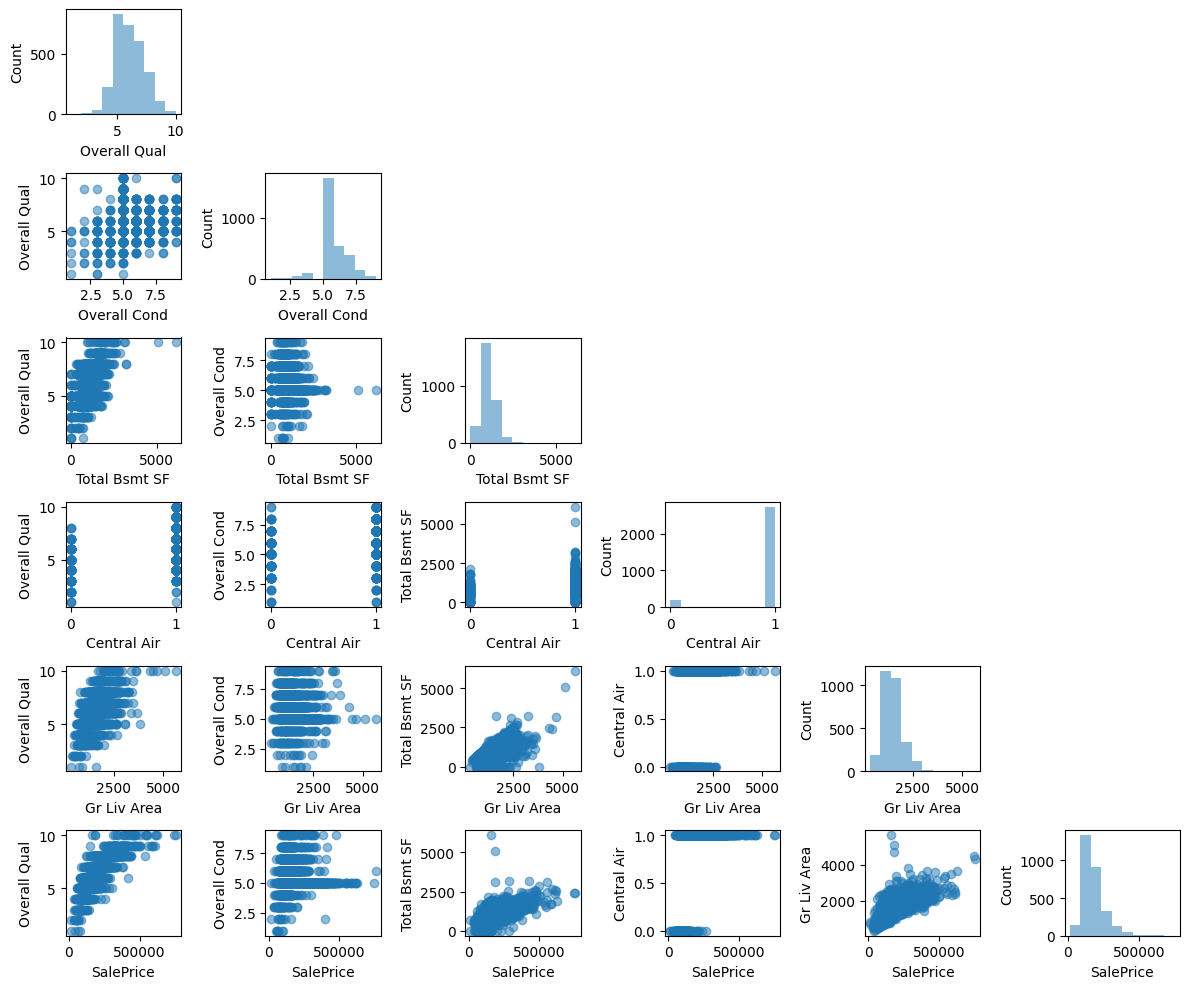

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, figsize=(12, 10), names = df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

- $\textbf{Correlation Matrix}$ - ca rescaled versiaon of the covariance matrix to quantify and summarize linear relationships between variables
- Correlation matrix is a square matrix that contains the $\textbf{Pearson product-moment correlation coefficient}$ (pearson's r) which measures the linear dependence between paris of features
    - Ranges [-1, 1]
    - $ r = \frac{\sum\limits_{i=1}^{n} [(x^{(i)} - \mu_{x})(y^{(i)} - \mu_{y})]}{\sqrt{\sum\limits_{i=1}^{n} (x^{(i)} - \mu_{x})^{2}}\sqrt{ \sum\limits_{i=1}^{n} (y^{(i)} - \mu_{y})}} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$
    - $\mu$ - mean
    - $\sigma_{xy}$ - covariance between features x and y
    - $\sigma_x$, $\sigma_y$ - feature standard deviations

<function matplotlib.pyplot.show(close=None, block=None)>

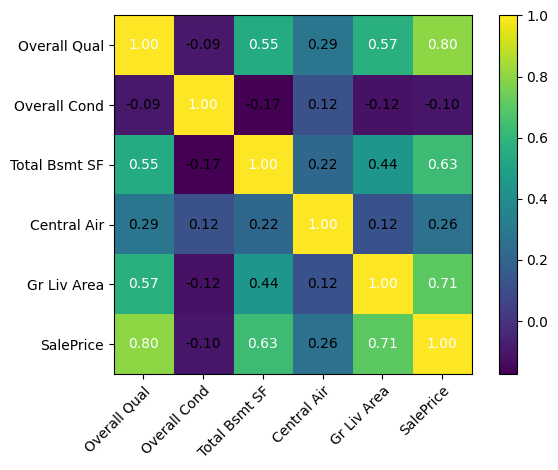

In [9]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show

In [12]:
from sklearn.linear_model import LinearRegression
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:3f}')

Slope: 111.666
Intercept: 13342.978662


In [17]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

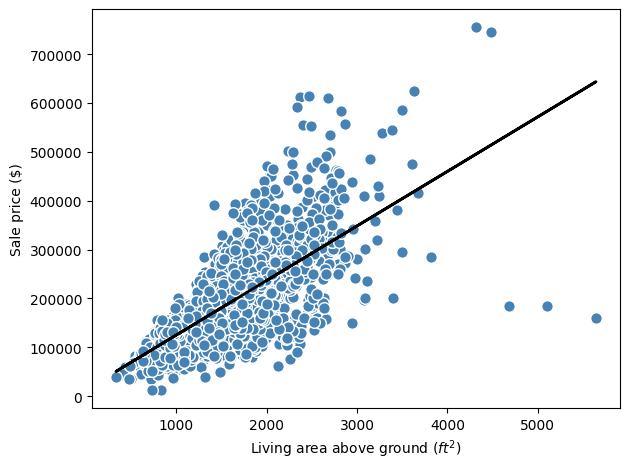

In [18]:
import matplotlib.pyplot as plt
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground ($ft^{2}$)')
plt.ylabel('Sale price ($)')
plt.tight_layout()
plt.show()

- Analytical Solution:
    - $w = (X^{T}X)^{-1}X^{T}y$ 

### 9.3 RANSAC

- Linear regression models can be heavily impacted by the presence of outliers.
- In some situations very small subset of our data can have a big effect on the estimated model coefficients
- Statisitcal methods can be used to remove outliers
- $\textbf{Random Sample Consensus (RANSAC) algorithm}$ - fits a regression model to a subset of the data, to the so-called inliers
    1. Select a random number of examples to be inliers and fit the model
    2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers
    3. Refit the model using all inliers
    4. Estimate the error of the fitted model versus the inliers
    5. Terminated the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations was reached, else go back to step 1

- In sklearn median absolute deviation (MAD) is used to select the inlier. The choice of this value is problem-specific, whcih is a disadvantake of RANSAC
- There are many different approaches to select a good inlier threshold automatically
  

In [30]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=0.95, residual_threshold=None, random_state=1)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95, random_state=1)

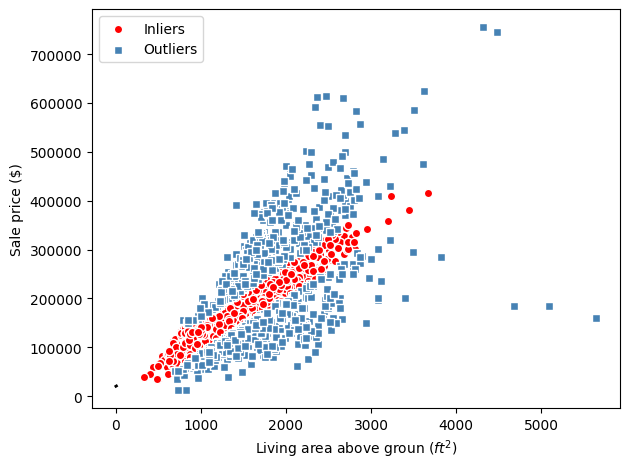

In [31]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='red', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='steelblue', edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above groun ($ft^{2}$)')
plt.ylabel('Sale price ($)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 9.4 Evaluating Linear Regression Models

In [32]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

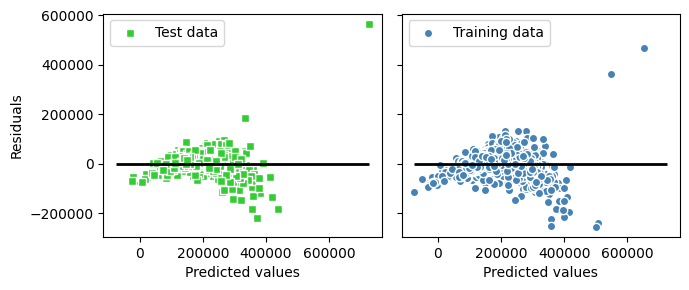

In [33]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()



#### Residual Plot
- The residuals should be randomly scattered around the centerline. If we see a pattern in a residuals plot, it means our model is unable to capture some explanatory information (We can see to a degree in our residual plot)
- We can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline

#### Mean Squared Error (MSE)
- $MSE = \frac{1}{n} \sum\limits_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^{2}$

In [36]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


- MSE on the training dataset is less than on the test set. This indicates that out model is slightly overfitting the training data

#### Mean Absolute Error (MAE)
- Show the error on the original scale
- $MAE = \frac{1}{n} \sum\limits_{i=1}^{n} |y^{(i)} - \hat{y}^{(i)}|$ 

In [37]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


- MAE and MSE are unbound, so their interpretation depends on the dataset and feature scaling

#### Coefficient of Determination $(R^{2})$
- Standardized version of MSE, for better interpretability of the model's performance
- Fraction of response variance that is captured by the model
- $R^2 = 1 - \frac{SSE}{SST}$
- Sum of squared error, SSE:
    - $SSE = \sum\limits_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^{2}$
- Total sum of squares, SST:
    - Variance of the response  
    - $SST = \sum\limits_{i=1}^{n} (y^{(i)} - \mu_{y})^{2}$ 

In [41]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^{2} train: {train_r2:.3f}')
print(f'R^{2} test: {test_r2:.3f}')

R^2 train: 0.769
R^2 test: 0.752


### 9.5 Regularized Methods

- Regularization is one approach to tackling the problem of overfitting by adding addition information and thereby shrinking the parameter values of the model to induce a penatly agaisnt complexity
- Popular Approaches:
    - Ridge Regression
    - Least absolute shrinkage and selection operator (LASS))
    - Elastic net

#### Ridge Regression
- L2 penalized model - add the squared sum of the weights to the MSE loss function:
    - $L(\textbf{w})_{Ridge} = \sum\limits_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^{2} + \lambda||\textbf{w}||^{2}_{2}$
    - $\lambda||\textbf{w}||^{2}_{2} = \lambda\sum\limits_{j=1}^{m} w_{j}^{2}$
 - Increasing the hyperparameter $\lambda$ increases the regularization strength and thereby shrinks the weights of our model
 - Regularization strength given by alpha in scikit-learn

In [ ]:
from sklearn.Linear_model import Ridge
ridge = Ridge(alpha=1.0)

#### LASSO
- Can lead to sparse models
- L1 penalized model, where certain weights become zero depending on regularization strength
    - $L(\textbf{w})_{Lasso} = \sum\limits_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^{2} + \lambda||\textbf{w}||_{1}$
    - $\lambda||\textbf{w}||_{1} = \lambda \sum\limits_{j=1}^{m} |w_{j}|$
- Useful as a supervised feature selection technique
- One limitation is that it slects at mode $n$ features if $m$ > $n$, where $n$ is the number of training examples
- May be undesirable in certain applications of feature selection
- Can be an advantage because it avoids saturated models (the number of training examples is equal to the number of features) a form off overparameterization
- Regularization strength given by alpha in scikit-learn

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

#### Elastic Net
- A compromise between ridge expression and LASSO is elastic network, which has an L1 penalty to generate sparsity and an L2 penalty such that it ban be used for selecting more than $n$ features if $m$ > $n$.
    - $L(\textbf{w})_{Elastic  Net} = \sum\limits_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^{2} + \lambda_{2}||\textbf{w}||^{2}_{2} + \lambda_{1}||\textbf{w}||_{1}$

- All three are available in scikit-learn.
- The regularization strength needs to be specified (optimized vis k-fold cross-validation)
- Scikit-learn allows us to vary the L1 to L2 ratio and set the regularization strength using l1_ratio and alpha

In [ ]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNew(alpha=1.0, l1_ratio=0.5)

### 9.6 Polynomial Regression

- One way to account for the violation of lineary assumption is to use polynomial regreesion model by adding polynomial terms
    - $y = \sum\limits_{i=1}^{d} w_{i}x^{i} + b$
- $d$ - degree of polynomial
- Still considered a miltiple linear regression model because of the linear regression coefficeints, $w$
- Adding more polynomial features increases the complexity of a model and therefore increases the chance of overfitting

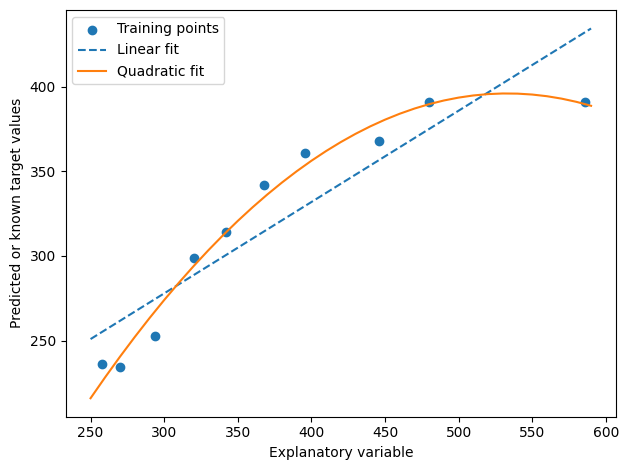

In [44]:
from sklearn.preprocessing import PolynomialFeatures
# Data
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

# linear Regression Models
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# Fit simple linear regression model
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Fit multiple regression
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_12.png', dpi=300)
plt.show()

### 9.7 Nonlinear Relationships using Random Forests

#### 9.7.1 Decision Tree Regression

- Random forest can be understood as the sum of piecewise linear functions
- Via the decision tree algorithm, we subdivide the input space into smaller regions that become more manageable
- Works with arbitrary features
- Does not require any transformation of the features if we are dealing with nonlinear data
- Unlike in classification we need a impurity metric that is suitable for continous variables. We define the impurity measure of a node, $t$, as the MSE instead:
    - $I(t) = MSE(t) = \frac{1}{N_{t}} \sum\limits_{i \epsilon D_{t}} (y^{(i)} - \hat{y}_{t})^{2}$
    - $N_{t}$ is the number of training examples at node $t$
    - $D_{t}$ is the training subset at node $t$
    - $y^{(i)}$ is the true target
    - $\hat{y}_{t}$ is the predicted target value
- Within this context MSE is often referred to as $\textbf{within-node variance}$ which is why the splitting criterion is also better known as $\textbf{variance reduction}$

Text(0, 0.5, 'Sale price ($)')

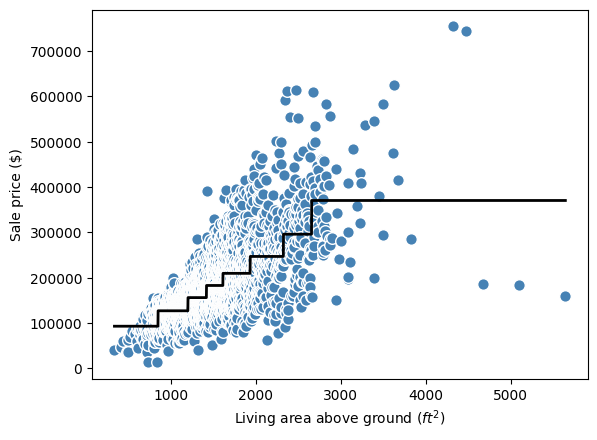

In [52]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground ($ft^{2}$)')
plt.ylabel('Sale price ($)')

- Can capture trends in nonlinear data prettywell
- One limitation is that it does not capture the continuity and differentiability of the desired prediction
- Also the depth must be chosen carefully so we don't over fit or under fit

#### 9.7.2 Random Forest Regression

- better generalization performance due to randomness, helping to decrease the model's variance
- Less sensitive to outliers in the dataset
- Doesn't require parameter tuning
- Only parameter we typically need to experiment with is the number of trees in the ensemble
- Almost identical to random forest classification except we use the MSE criterion for the individual decision trees
- Also the predicted target vaariable is calcualted as the average prediction across all decision trees

In [53]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85


- Overfit the training data, but still performs better onthe test data over the linear regression models ($R^{2} = 0.75$)

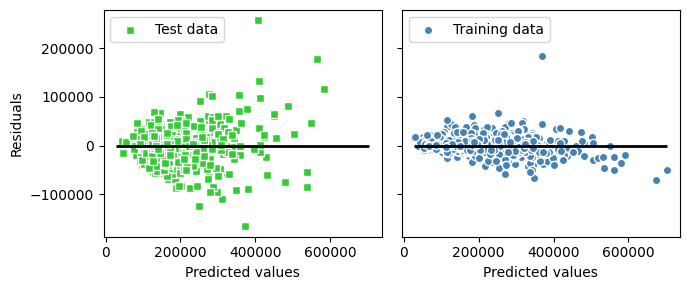

In [55]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_16.png', dpi=300)
plt.show()


- Improvement in the outliers and the randomness around zero compared to the other models
- If we find patterns in the prediction errors (residual plots) it means that the residual plots contain predictive information. This mean explanatory information is leaking into those residuals.
- To improve randomness we can:
    - Transofrm variables
    - Tune hyperparameters of the learning algorithm
    - Choose simpler or more comples models
    - Remove outliers
    - Include additional variables  

## Chapter 10: Clustering Analysis

- $\textbf{Clustering}$ is a technique that allows us to find groups of similiar objects that more related to each other than to objects in other groups
- Categories:
    - Prototype-based Clustering - each cluster is represented by a prototype (centroid (average) or medoid (most representative or minimum distance to other points)
    - Hierarchical Clustering
    - Density-based Clustering 
    - Graph-based clustering - use the eigenvectors of a similarity o distance matrix to derive the cluster relationships

### 10.1 k-means Clustering

- Extremely easy to implement and is very efficient compared to other clustering algorithms
- Prototype-based clustering
- Very good at identifying clusters with a spherical shape
- Need to specify the the number of clusters, $k$, $\textit{a priori}$
- Unsupervised
- Algorithm:
    1. Randomly pick $k$-centroids from the examples as initial cluster centers
    2. Assign each example to the nearest centroid, $\mu^{(j)}$, $j$ $\in$ {1,...,$k$}
    3. Move the centroids to the center of the examples that were assigned to it
    4. Repeat steps 2-3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached
- We defined similarity as the opposite of distance. For continuous features we use the squared euclidean distance
    - $d(\textbf{x},\textbf{y})^{2} = \sum\limits_{j=1}^{m} (x_{j} - y_{j})^{2} = ||\textbf{x} - \textbf{y}||^{2}_{2}$
    - $j$ refers to the $j$th dimension
    - $i$ is the index of the example
- Basedon this metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE) also called the cluster inertia:
    - $SSE = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{k} w^{(i,j)} || \mathbf{x}^{(i)} - \mathbf{\mu}^{(j)}||^{2}_{2}$
    - $\mathbf{\mu}^{(j)}$ - representative point (centroid) for cluster $j$
    - $w^{(i,j)} = \begin{cases} 1, \text{if } \mathbf{x}^{(i)} \in j \\ 0, \text{otherwise} \end{cases}$

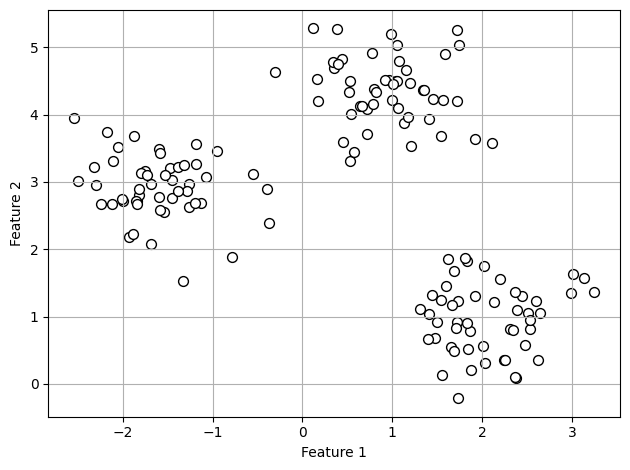

In [56]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150, n_features=2,  centers=3,  cluster_std=0.5,  shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_01.png', dpi=300)
plt.show()

In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

/usr/local/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


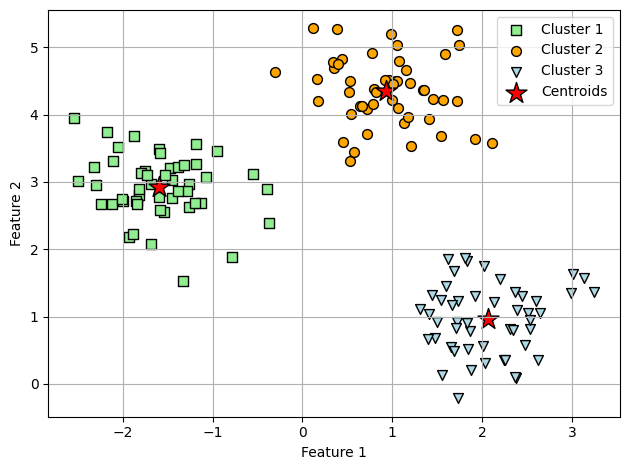

In [62]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_02.png', dpi=300)
plt.show()


- The number of clusters to choose may not be so obvious in real-world applications, especially in higher-dimensional datasets that we can not visualize

#### k-means++
- It does not improve the drawbacks of k-means clustering by can greatly improve the clustering results through more clever seeding of initial clustters
- Bad initial seeding can cause bad clustering or slow convergence
- We addressed this in our example by running it 10 times and selecting the model with the loswer SSE
- k-meaans++ places the initial centroids far away from each other which leads to better and more consistenct results
- Algorithm:
    1. Initialize an empty set, $\textbf{M}$, to store the $k$ centroids being selected
    2. Randomly choose the first centroid, $\mathbf{\mu}^{(j)}$, from the input examples and assign it to $\textbf{M}$
    3. For each example, $x^{(i)}$, that is not in $\textbf{M}$, find the minimum squared distance, $d(x^{(i)}, \mathbf{M})^{2}$, to any of the centroids $\textbf{M}$
    4. To randomly select the next centroid, $\mathbf{\mu}^{(p)}$, use a weighted probability distribution equal to $\frac{d(\mathbf{\mu}^{(p)}, \mathbf{M})^{2}}{\sum\limits_{i} d(x^{(i)}, \mathbf{M})^{2}}$. For instance, we collect all points in an array and choose a weighted random sampling, such that the larger the squared distance, the more liekly a point gets chosen as the centroid
    5. Repeat step 3-4 until $k$ centroids are chosen
    6. Proceed with the class k-means algorithm

#### Hard versus soft clustering
- $\textbf{Hard clustering}$ - a family of algorithms where each example in a dataset is assigned to exactly one cluster (k-means and k-means++)
- $\textbf{Soft clustering}$ - assign an example to one or more clusters

#### Fuzzy C-means (FCM)
- Also called soft k-means or fuzzy k-means
- Replaces the hard cluster assignment with probabilities for each point belonging to each cluster
- Express the cluster membership of an example, x with a sparse vector of binary values:
    -  $\begin{bmatrix} x \in \mu^{(1)} & \rightarrow & w^{(i,j)} = 0 \\ x \in \mu^{(2)} & \rightarrow & w^{(i,j)} = 1 \\ x \in \mu^{(3)} & \rightarrow & w^{(i,j)} = 0\end{bmatrix}$ vs $\begin{bmatrix} x \in \mu^{(1)} & \rightarrow & w^{(i,j)} = 0.1 \\ x \in \mu^{(2)} & \rightarrow & w^{(i,j)} = 0.85 \\ x \in \mu^{(3)} & \rightarrow & w^{(i,j)} = 0.05 \end{bmatrix}$
-  Each value falls in the range [0,1] and represents a probability of membership of the respective cluster centroid and the sum us equal to 
- Algorithm:
    1. Specify the number of $k$ centroids and randomly assign the cluster memberships for each point
    2. Compute the cluster centroids, $\mathbf{\mu}^{(j)}$, $j \in $ {1,...,$k$}
    3. Update the cluster memberships for each point
    4. Repeatsteps 2-3 until the membership coefficients do not change or a user-defined tolerance or maximum number of iterations is reached
- Objective function of FCM: $J_{m} = \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{k} w^{(i,j)^{m}} || \mathbf{x}^{(i)} - \mathbf{\mu}^{(j)}||^{2}_{2}$
- $m$ - fuzzines coefficent (fuzzifier) any number greater than or equal to 1
- The larger the value of $m$, the smaller the cluster membership, $w^{(i,j)}$ becomes, which leads to fuzzier clusters
- Cluster membership proabability: $ w^{(i,j)} = \left[ \sum\limits_{c=1}^{k} \left( \frac{||\mathbf{x}^{(i)} - \mathbf{\mu}^{(j)}||_{2}}{|\mathbf{x}^{(i)} - \mathbf{\mu}^{(c)}||_{2}}\right)^{\frac{2}{m-1}} \right]^{-1}$
- Center of cluster: $\mathbf{\mu}^{(j)} = \frac{\sum\limits_{i=1}^{n} w^{(i,j)^{m}} \mathbf{x}^{(i)}}{\sum\limits_{i=1}^{n} w^{(i,j)^{m}}}$
- FCM iteration is more expensive than k-means iteration but requires fewer iterations overall to reach convergence
- Produces very similar clustering outputs as k-means
  
#### Elbow plots

We don't know the labels, so to quantify the quality of clustering, we need to use intrinsic metrics
- $\textbf{Distortion}$ - within-cluster SSE

In [63]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


- Based on the distortion we can use the elbow method
- Graphical tool to estimate the optimal number of clusters, $k$ for a given task
- When $k$ increases the distortion decreases. The elbow method is to identify the value of $k$ where the distortion begins to increase most rapidly
  

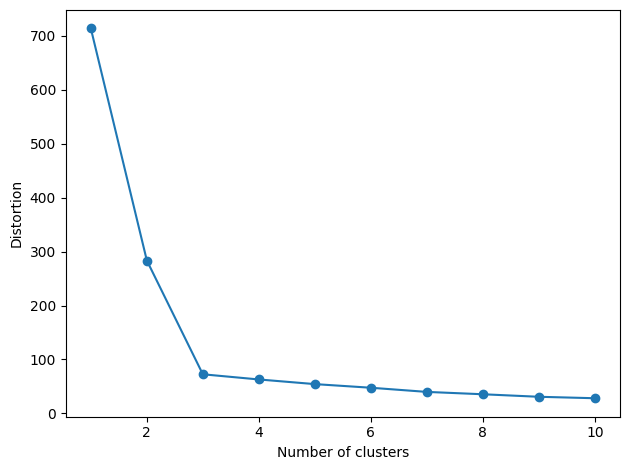

In [64]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,  init='k-means++',  n_init=10,  max_iter=300,  random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('figures/10_03.png', dpi=300)
plt.show()

#### Silhouette plots

- Evaluate the quality of a clustering.
- Can be applied to other clustering algorithms than k-means
- Calculate the $\textbf{silhouette coefficient}$:
    1. Calculate the cluster cohesion, $\alpha^{(i)}$, as the average distance between an example, %x^{(i)}, and all other points in the same cluster
    2. Calculatethe cluster separation, $b^{(i)}$, from the next closest cluster as the average distance between the exmple, $x^{(i)}$, and all examples in the nearest cluster
    3. Calculate the silhouette, $s^{(i)}$, as the difference between cluster cohesion and separation divided by the greater of the two, as shown here:
        - $s^{(i)} = \frac{b^{(i)} - a^{(i)}}{max[b^{(i)},a^{(i)}]}$  

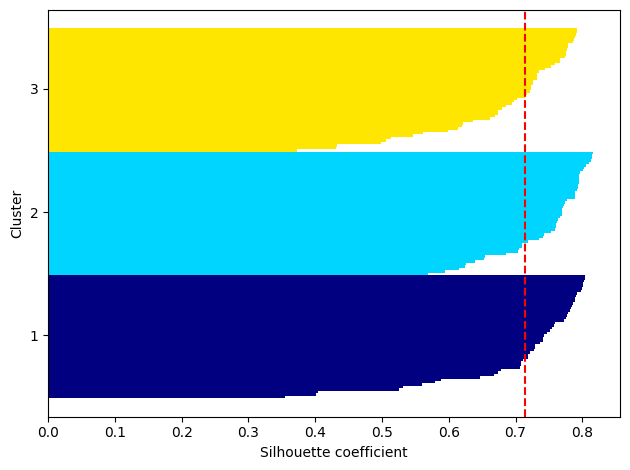

In [68]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


km = KMeans(n_clusters=3, init='k-means++',  n_init=10,  max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_04.png', dpi=300)
plt.show()

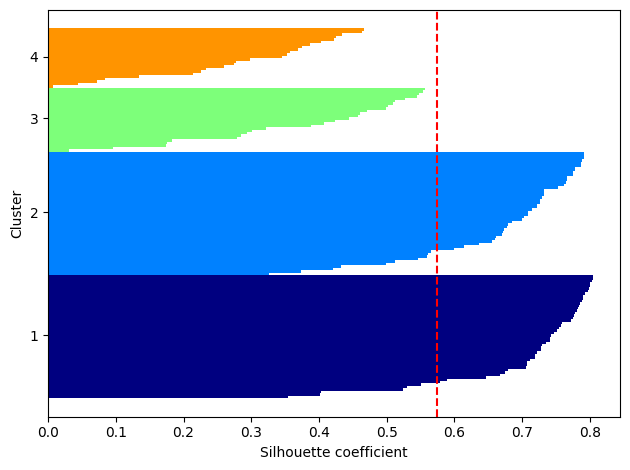

In [73]:
km = KMeans(n_clusters=4, init='k-means++',  n_init=10,  max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_04.png', dpi=300)
plt.show()

### 10.2 Hierarchical Clustering

- Hierarchical clustering is a prototype based clustering
- Allows us to plot dendrograms
- Approaches:
    - Agglomerative - start with one example an an individual cluster and merge the closest pairs of clusters until only one cluster remails
    - Divisive - start with one cluster that encompasses the complete dataset, and iteratively split the cluster into smaller clusters until each cluster only contains one example
 
#### Agglomerative

- There are two algorithms for agglomerative hierarchical clustering:
    - Single linkage - compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distances between the most similar members is the smallest
    - Complete linkage - instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge
    - Average linkage - merge the clusters pairs based on the minimum average distances between all group members in the two clusters
    - Ward's linkage - the two clusters that lead to the minimum increase of the total within-cluster SSE are merged

- $\textbf{Hierarchical Complete Linkage}$:
    1. Compute a pair-wise distance matrix of all examples
    2. Represent each data point as a singleton cluster
    3. Merge the two closest clusters based on the distances between the most dissimilar (distant) members
    4. Update the cluster linkage matrix
    5. Repear steps 2-4 until one single cluster remains 

In [82]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)

In [83]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2','distance', 'no. of items in clust.'], index=[f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


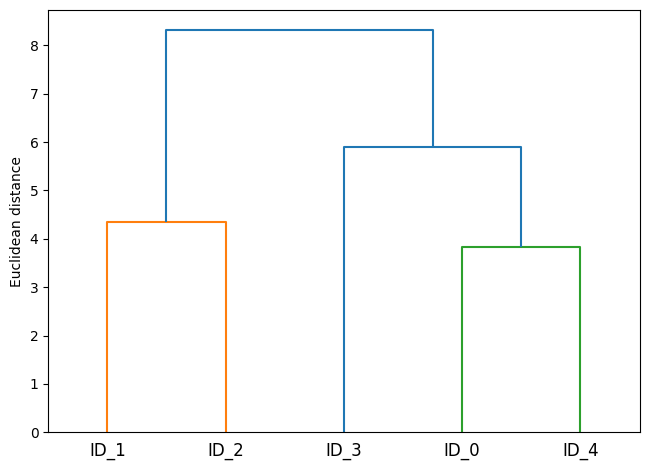

In [84]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

/var/folders/j7/r32w1g2s1453yzksbljngwdc0000gq/T/ipykernel_19791/2313058498.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/j7/r32w1g2s1453yzksbljngwdc0000gq/T/ipykernel_19791/2313058498.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


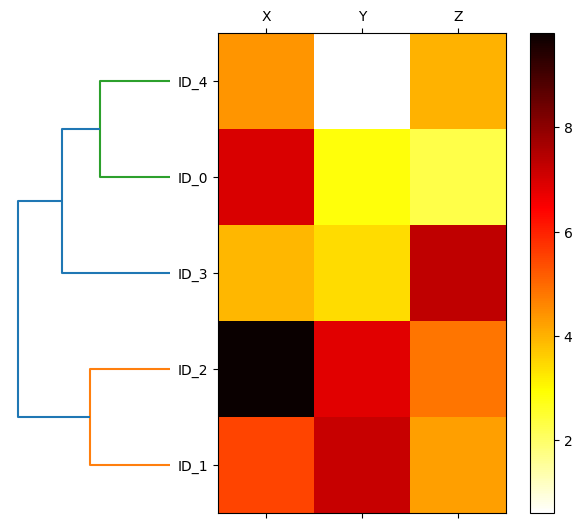

In [85]:

# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('figures/10_12.png', dpi=300)
plt.show()


In [88]:
from sklearn.cluster import AgglomerativeClustering

# 3 Clusters
ac = AgglomerativeClustering(n_clusters=3,  affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')
# 2 Clusters
ac = AgglomerativeClustering(n_clusters=2,  affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')


Cluster labels: [1 0 0 2 1]
Cluster labels: [0 1 1 0 0]


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### 10.3 DBSCAN

- Density-based spatial cllustering of applciations with noise (DBSCAN)
- Does not assume spherical clusters
- Does not partition the dataset into hierarchies that require a manual-cutoff point
- Assigns cluster labels based on dense regions of points
- Density is defined as the number of points within a specified radius, $\epsilon$
- A special label is assigned to each example using the following criteria:
    -  A point is considered a core point if at least a specified number (MinPts) of neighboring points fall within the specified radius, $\epsilon$
    -  A border point is a point that has fewer neighbors than MinPts within $\epsilon$, but lies within the $\epsilon$ radius of a core point
    -  All other points that are neighter core not border points are considered noise points
- Algorithm:
    1. Form a separate cluster for each core point or connected group of core points.
    2. Assign each border point to the cluster iof its corresponding core point
 
<img src="figures/DBSCAN.png" width="30%"/>

- With an increasing number of features in our dataset - assuming fixed number of training examples - the negative effect of the curse of dimensionality increases (especially with euclidean distance metric)
    - Effects k-means and hierarchical clustering as well
    - It is common to apply dimensionality reduction techniques before clustering to avoid this problem (PCA or t-SNE)
    - Also compresisng the data down into 2-dimensional subspaces which allows us to visualize the clustters and assigned labels using 2D-scatterplots
- There are 2 hyperparameters in DBSCAN:
    - MinPts
    - $\epsilon$
- Tuning the hyperparameters can be problematic if the density differences in the dataset are relatively large 

## Chapter 11: Implementing a Multilayer Artifical Neural Network from Scratch

### 11.1 Modeling Complex Functions with Artificial Neural Networks

#### 11.1.1 Single-layer neural network

- Compute the gradient based on the whole training dataset and update the weights of the model by taking a step in the opposite direction of the loss gradient, $\nabla L(\mathbf{w})$
- $\mathbf{w} \coloneqq \mathbf{w} + \Delta\mathbf{w}$
- $\Delta w_{j} = -\eta \frac{\delta L}{\delta w_{j}}$
- $b \coloneqq b + \Delta b$
- $\Delta b = -\eta \frac{\delta L}{\delta b}$
- In order to find the optimal weights of the model, we optimized an objective function that we defined as the mean of squared errors (MSE) loss function, $L(w)$
- We multiply the gradient by a factor the learning rate, $\eta$, which we have to choose carefully to balance the speed of learning agaisnt the risk of overshooting the global minimum of the loss function


<img src="figures/SingleLayerNeuralNetwork.png" width="30%"/>

- In gradient descent optimization, we updated all weights simulaneously after each epoch. The partial derivative for each weight, $w_{j}$ in the weight vector, $\mathbf{w}$ is:
    - $\frac{\delta L}{\delta w_{j}} = \frac{\delta}{\delta w_{j}} \frac{1}{n} \sum\limits_{i} (y^{(i)} - a^{(i)})^{2} = -\frac{2}{n} \sum\limits_{i} (y^{(i)} - a^{(i)})x_{j}^{(i)}$
    - $y^{(i)}$ - target class label of a particular sample $x^{(i)}$
    - $a^{(i)}$ - activation of the neuron (linear function in Adaline)
- Activation fucntion:
    - $\sigma(\cdot) = z = a$
- Net input:
    - $ z = \sum_{j} w_{j}x_{j} + b = \mathbf{w}^{T}\mathbf{x} + b$
 
- We use the activation function to compute the gradient update, but we implement a threshold function to squash the continuous-valued output into binary class labels for prediction:
    - $\hat{y} = \begin{cases} 1, \text{  if } z \geq 0; \\ 0, \text{ otherwise} \end{cases}$

- One trick to accelerate the model learning is to use stochastic gradient descent (SGD) iotimization
    - Approximates the loss from a single training sample (online learning) or a small subset of training examples (mini-batch learning)
    - Faster learning due to more frequent weight updates compared to gradient descent
    - It noisy nature is regarded as beneficial when training multilayer NNs with nonlinear activation functions which do not have a convex loss function. The added noise can help escape local minima
 

#### 11.1.2 Multi-layer neural network

- Connct multiple single neurons to a multilayer feedforward NN
    - Special type of $\textit{fully connected}$ network is also called the $\textbf{multilayer perceptron (MLP)}$

<img src="figures/MultiLayerNeuralNetwork.png" width="30%"/>

- Consists of:
    1. An input layer
    2. A single hidden layer
    3. An output layer
- All layers are fully connected to it neighboring layer
- If the network as more than one hidden layer it is called a $\textbf{deep neural network}$
- We can add any number of hidden layers. Practically, we can think of the number of layers and units in an NN as additional hyperparameters that we want to optimize for a given problem task using the cross-validation technique
- However, the loss gradients for updating the network's parameters (calculate via backpropgation) will become increasingly small as more layers are added to a network
- Special algorithms have been developed to help train DNN structures, this is known as deep learning
- Math note: The connection between the $k$th unit in layer $l$ to the $j$th unit in layer $l + 1$ is written as $w_{j,k}^{(i+1)}$
- Use one-hot representation of categorical variables. (all labels are vectors with a 1 value for the particular label index)
- MLP Learning Procedure:
    1. Starting at the input layer, we forward propogate the patterns of the training data through the network to generate an output
    2. Based on the network's output, we calculate the loss that we want to minimize using a loss function that we will describe later
    3. We backpropagate the loss, find its dereivative with respect to each weight and bias unit in the network, and update the model
    4. Repeat for multiple epochs and learn the weight and bias parameters of the MLP. We use forward propagtion to  calcualte the network output and apply a threshold function to obtain the predicted class labels in the one-hot representation
- Forward propagtation - refers to the fact that each layer serves as the input to the next layer without loops:
    1. Since each unit in the hidden layer is connected to all units in the input layers, we first calculate the activation unit of the hidden layer $a_{1}^{(h)}$ as:
        - Net input: $z_{1}^{(h)} = x_{1}^{(in)}w_{1,1}^{(h)} + x_{2}^{(in)}w_{1,2}^{(h)} + ... + x_{m}^{(in)}w_{1,m}^{(h)}$
        - Activation function: $a_{1}^{(h)} = \sigma(z_{1}^{(h)})$
        - To solve complex problems, we need nonlinear activation functions in out MLP model, sucha as the sigmoid activation function
            - $\sigma(z) = \frac{1}{1 + e^{-z}}$
- We can write the activation in a more compact form using concepts of basic linear algebra for the purposes of code efficiency and readability. (We can vectorize our code)
    - $z^{(h)} = \mathbf{x}^{(in)}\mathbf{W}^{(h)T} + \mathbf{b}^{(h)}$
        - $x^{(in)}$ is our 1$\times m$ dimensional feature vector
        - $W^{(h)}$ is a $d \times m$ dimensional weight matrix
        - $d$ is the number of units in the hidden layer
        - $b^{(h)}$ consists of $d$ bias units (1 per hidden node)
    - $a^{(h)} = \sigma(\mathbf{z}^{(h)})$
    - We obtain the $1 \times d$ net input vector $z^{(h)}$ to calculate the activation $a^{(h)}$
    - We can generalize this computation to all n examples in the training dataset:
        - $\mathbf{Z}^{(h)} = \mathbf{X}^{(in)}\mathbf{W}^{(h)T} + \mathbf{b}^{(h)}$
            - $\mathbf{X}^{(in)}$  is now an $n \times m$
            - $\mathbf{Z}^{(h)}$ - an $n \times d$ dimensional net inpit matrix
    - We apply the activation function $\sigma(\cdot)$ to each value in the net input matrix to get the $n \times d$ activation matrix in the next layer
        - $\mathbf{A}^{(h)} = \sigma(\mathbf{Z}^{(h)})$
    - We can write the activation of the output layer in vectorized form for multiple examples:
        - $\mathbf{Z}^{(out)} = \mathbf{A}^{(h)}\mathbf{W}^{(out)T} + \mathbf{b}^{(out)}$
    - We multiply the transpose of the $t \times d$ matrix $\mathbf{W}^{(out)}$ by the $n \times d$ dimensional matrix, $\mathbf{A}^{(h)}$, ad add the $t$ dimensional bias vector $\mathbf{b}^{(out)}$ to obtain the $n \times t$ dimensional matrix $\mathbf{Z}^{(out)}$. Lastly, we apply the sigmoic activation function to obtain the continous-valued output of our network:
        - $\mathbf{A}^{(out)} = \sigma(\mathbf{Z}^{(out)})$ 

### 11.2 Classifying Handwritten Digits

In [106]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.values
y = y.values.astype(int)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [107]:
X = ((X  / 55.) - 0.5) * 2

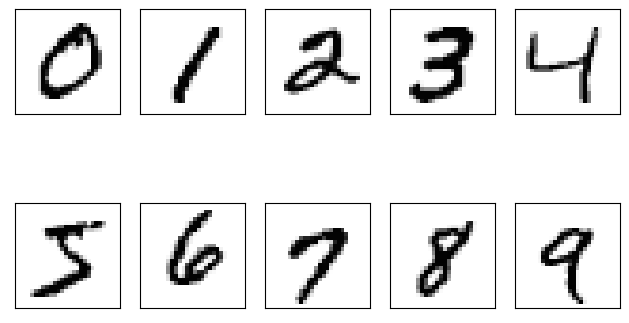

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X[y == 9][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [110]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)

# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [120]:
import numpy as np
def sigmoid(z):
    return 1. / (1. + np.exp(-z))
def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):  
    
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)


- The backward method implements the so-called backpropogation algorithm, which calculates the gradients of the loss with respect to the weight and bias parameters
- The These gradients are then used to update these parameters via gradient descent
- Utilizizes .forward() and .backward() methods instead of .fit() and .predict() methods because this similiar to how more advanced deep learning libraries such as PyTorch operate

In [121]:
model = NeuralNetMLP(num_features=28*28, num_hidden=50, num_classes=10)

In [122]:
import numpy as np
num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y ,minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        yield X[batch_idx], y[batch_idx]

# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size)
    
    for X_train_mini, y_train_mini in minibatch_gen:

        break
        
    break
    
print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


In [123]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 11.6%


In [124]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
        
    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')


Initial valid MSE: 0.3
Initial valid accuracy: 11.6%


In [125]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
        
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [126]:
np.random.seed(123) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_valid_acc = train( model, X_train, y_train, X_valid, y_valid, num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.03 | Train Acc: 84.84% | Valid Acc: 84.54%
Epoch: 002/050 | Train MSE: 0.02 | Train Acc: 89.08% | Valid Acc: 88.88%
Epoch: 003/050 | Train MSE: 0.02 | Train Acc: 90.75% | Valid Acc: 90.30%
Epoch: 004/050 | Train MSE: 0.02 | Train Acc: 91.82% | Valid Acc: 90.84%
Epoch: 005/050 | Train MSE: 0.01 | Train Acc: 92.39% | Valid Acc: 91.70%
Epoch: 006/050 | Train MSE: 0.01 | Train Acc: 92.95% | Valid Acc: 92.24%
Epoch: 007/050 | Train MSE: 0.01 | Train Acc: 93.31% | Valid Acc: 92.54%
Epoch: 008/050 | Train MSE: 0.01 | Train Acc: 93.62% | Valid Acc: 92.96%
Epoch: 009/050 | Train MSE: 0.01 | Train Acc: 93.99% | Valid Acc: 93.12%
Epoch: 010/050 | Train MSE: 0.01 | Train Acc: 94.20% | Valid Acc: 93.24%
Epoch: 011/050 | Train MSE: 0.01 | Train Acc: 94.45% | Valid Acc: 93.46%
Epoch: 012/050 | Train MSE: 0.01 | Train Acc: 94.68% | Valid Acc: 93.72%
Epoch: 013/050 | Train MSE: 0.01 | Train Acc: 94.83% | Valid Acc: 93.62%
Epoch: 014/050 | Train MSE: 0.01 | Train Acc: 95.00

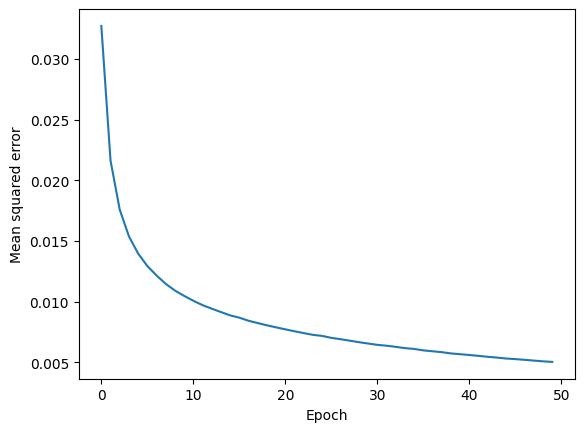

In [127]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
#plt.savefig('figures/11_07.png', dpi=300)
plt.show()


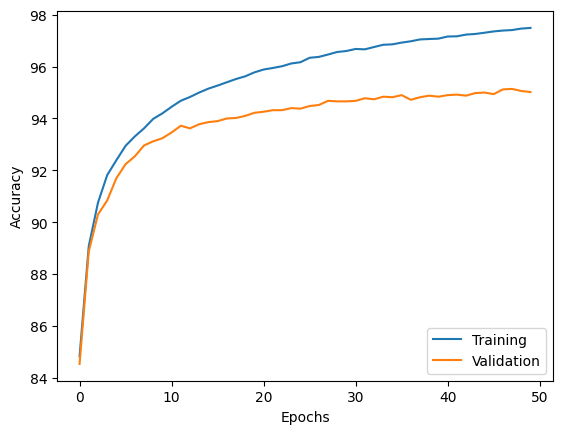

In [128]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

In [129]:
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 95.04%


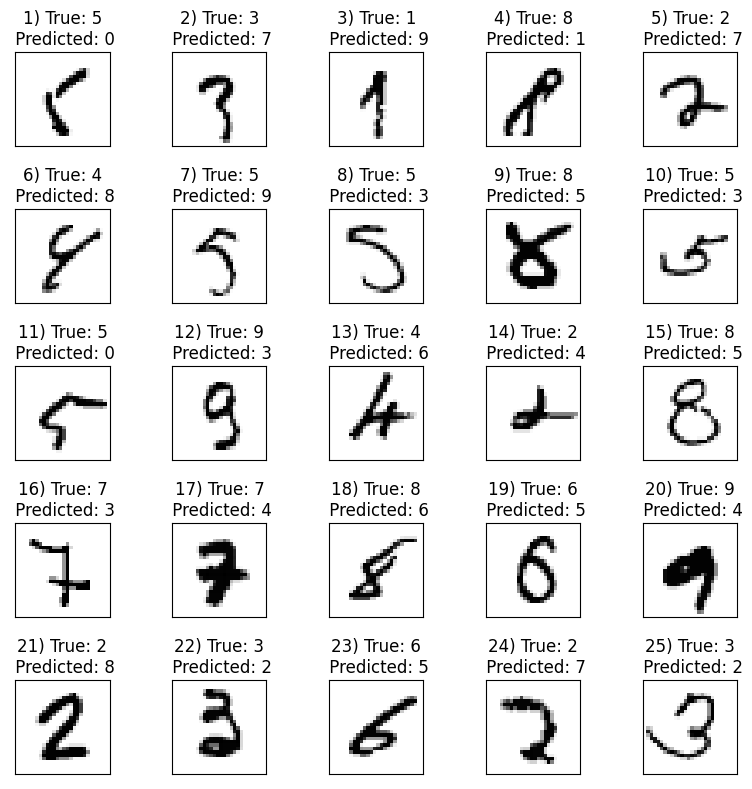

In [130]:


X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, 
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show()



- To fine tune the model:
    - Change the number of hidden units
    - Change the learning rate
    - Add skip-connections - main contribution of residual NNs
    - Uselearning rate schedulars that change the learning rate during traing
    - Attach loss functions to earlier layers in the networks as it's being done in the popular Inception v3 architecture
    - Adaptive learning rates
    - More sophisticated SGD-based optimizaiton algorithms
    - Batch Normalization
    - Dropout

### 11.3 Training an Artificial Neural Network

In [89]:
import numpy as np

x=5

In [90]:
print(x)

5
